
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


,Timestamp_f1,MM_Timestamp_f1,THEORETICAL_TONNAGE_f3,Coke_Rate_f3,HOT_BLAST_TMP_NS_f3,WINDRATE_f3,SNORT_VALVE_POSITION_f3,COLD_BLAST_MOISTURE_f3,HOST_BLAST_MOISTURE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,NAT_GAS _INJECTION_f3,HOT_BLAST_PRESSURE_f3,TOP_PRESS_f3,TOP_TEMP_HIGHEST_f3,Top_Gas_ETACO_f3,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,SILICON_f3,SULFUR_f3,MANGANESE_f3,PHOSPHOROUS_f3,HOT_METAL_TEMP_f3,Slag_CaO_day_avg_f3,Slag_MgO_day_avg_f3,Slag_SiO2_f3,Slag_Al2O3_day_avg_f3,#14 WEST STOCKROD LEVEL,#14 EAST STOCKROD LEVEL,#14 RADAR ROD NORTH LEVEL,#14 RADAR ROD SOUTH LEVEL,Charges_per_hour_f3,BF14 material 1 weight,BF14 extra coke weight,BF14 material 2 weight,BF14 material 2 weight.1,BF14 material 3 weight,BF14 material 3 weight.1,BF14 material 4 weight,BF14 material 4 weight.1,BF14 material 5 weight,BF14 material 5 weight.1,BF14 material 6 weight,BF14 material 6 weight.1,BF14 material 7 weight,BF14 material 7 weight.1,BF14 material 8 weight,BF14 material 8 weight.1,BF14 material 9 weight,BF14 material 9 weight.1,BF14 material 10 weight,BF14 material 10 weight.1,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,pd_index,date_f1,CNUM,LNUM_f1,SI_f1,S_f1,MN_f1,P_f1,CU_f1,NI_f1,CR_f1,MO_f1,TI_f1,HM_Temp_f1,ProbeSi_f1,Time_f1,Compliant_eq_1_f1,C_perce_sat_f1,Before_After_f1,Good_bad_f1,date,Slag_Time_f2,Open_Time_f2,Close_Time_f2,Taphole_f2,Pipe_burn_hole_f2,Taphole_Length_f2,Clay_box_f2,Clay_Close_hole_ft3_f2,Clay_temp_f2,Drill_bit_size_f2,Drill_shafts_used_f2,Cast_Avg_Temp_f2,Cast_Avg_Si_f2,Cast_Avg_S_f2,Cast_Avg_Mn_f2,Cast_Avg_P_f2,Cast_Avg_Cu_f2,Cast_Avg_Ni_f2,Cast_Avg_Cr_f2,Cast_Avg_Mo_f2,Cast_Avg_Ti_f2,Slag_Fe_f2,Slag_SiO2_f2,Slag_Al2O3_f2,Slag_CaO_f2,Slag_MgO_f2,Slag_S_f2,Slag_K2O_f2,Slag_B_SiO2_f2,Slag_TiO2_f2,cokerate_f4
0,2021-08-01 01:23:00,2021-08-01 00:00:00,6006,992,1999.604384,179.749638,98.334297,4.997585,8.084517,2.510680,0.0,4034.234339,34.357590,17.398326,245.335109,0.458303,22.322068,18.729296,3.559210,54.250139,0.776,0.052,0.510,0.068,2736.960938,37.830002,10.577999,38.029511,7.084000,8.720904,-0.001068,8.455500,8.706066,4.172247,226085.1667,309.166667,653422.0,15730100,103426.0000,2756060,0,0,0,0,0.000000,0,31782.33333,848140,0,0,21118.33333,562140,9022.666667,212980,158.478922,245.634175,145.396538,220.717349,0,44409,2809,182,1.152,0.042,0.577,0.077,0.003,0.020,0.052,0.002,0.036,2677,NaN,0.057639,NaN,4.692156,B,0.0,8/1/2021 0:00,00:59,00:55,03:23,2,0,11.4,602,2.75,165,2.12,1,2714,1.048,0.046,0.546,0.075,0.003,0.018,0.051,0.002,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41,992
1,2021-08-01 01:23:00,2021-08-01 00:01:00,6006,992,2000.288837,179.765945,98.334297,5.000531,8.079545,2.489381,0.0,4024.947376,34.328821,17.483486,251.198262,0.458277,22.335329,18.731320,3.559234,54.194257,0.776,0.052,0.510,0.068,2736.960938,37.830002,10.577999,38.029511,7.084000,3.973097,-0.001068,8.617396,8.988543,4.166692,226655.5000,927.500000,651306.0,15730100,103438.0000,2756060,0,0,0,0,0.000000,0,31787.00000,848140,0,0,21115.00000,562140,8988.000000,212980,159.637733,252.459217,145.570895,226.360600,0,44409,2809,182,1.152,0.042,0.577,0.077,0.003,0.020,0.052,0.002,0.036,2677,NaN,0.057639,NaN,4.692156,B,0.0,8/1/2021 0:00,00:59,00:55,03:23,2,0,11.4,602,2.75,165,2.12,1,2714,1.048,0.046,0.546,0.075,0.003,0.018,0.051,0.002,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41,992
2,2021-08-01 01:23:00,2021-08-01 00:02:00,6006,992,1999.242862,179.782251,98.334297,5.003476,8.074573,2.489037,0.0,4011.601682,34.300052,17.260358,242.609669,0.458250,22.348590,18.733343,3.559259,54.138374,0.776,0.052,0.510,0.068,2736.960938,37.830002,10.577999,38.029511,7.084000,0.158669,-0.001068,8.654926,9.076585,4.166692,227225.8333,1545.833333,649190.0,15730100,103450.0000,2756060,0,0,0,0,0.000000,0,31791.66667,848140,0,0,21111.66667,562140,8953.333333,212980,160.796544,252.645736,145.745252,230.297540,0,44409,2809,182,1.152,0.042,0.577,0.077,0.003,0.020,0.052,0.002,0.036,2677,NaN,0.057639,


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,date_f1,CNUM,LNUM_f1,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
1,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,44562.0,2.0,168.666667,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
2,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,44562.0,6.0,137.450000,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
3,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,44562.0,7.0,156.684211,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
4,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,44562.0,8.0,150.869919,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
5,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,44562.0,9.0,160.218182,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,44561.0,4344.0,147.500000,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,3.0,2730.002686,884.0
1391,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,44561.0,4345.0,147.500000,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,1.0,2730.002686,884.0
1392,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,44561.0,4346.0,174.000000,21.048415,18.309327,4.129862,55.140373,166.903493,181.684648,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,3.0,2730.002686,884.0
1393,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,44561.0,4347.0,160.000000,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,1.0,2730.002686,884.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

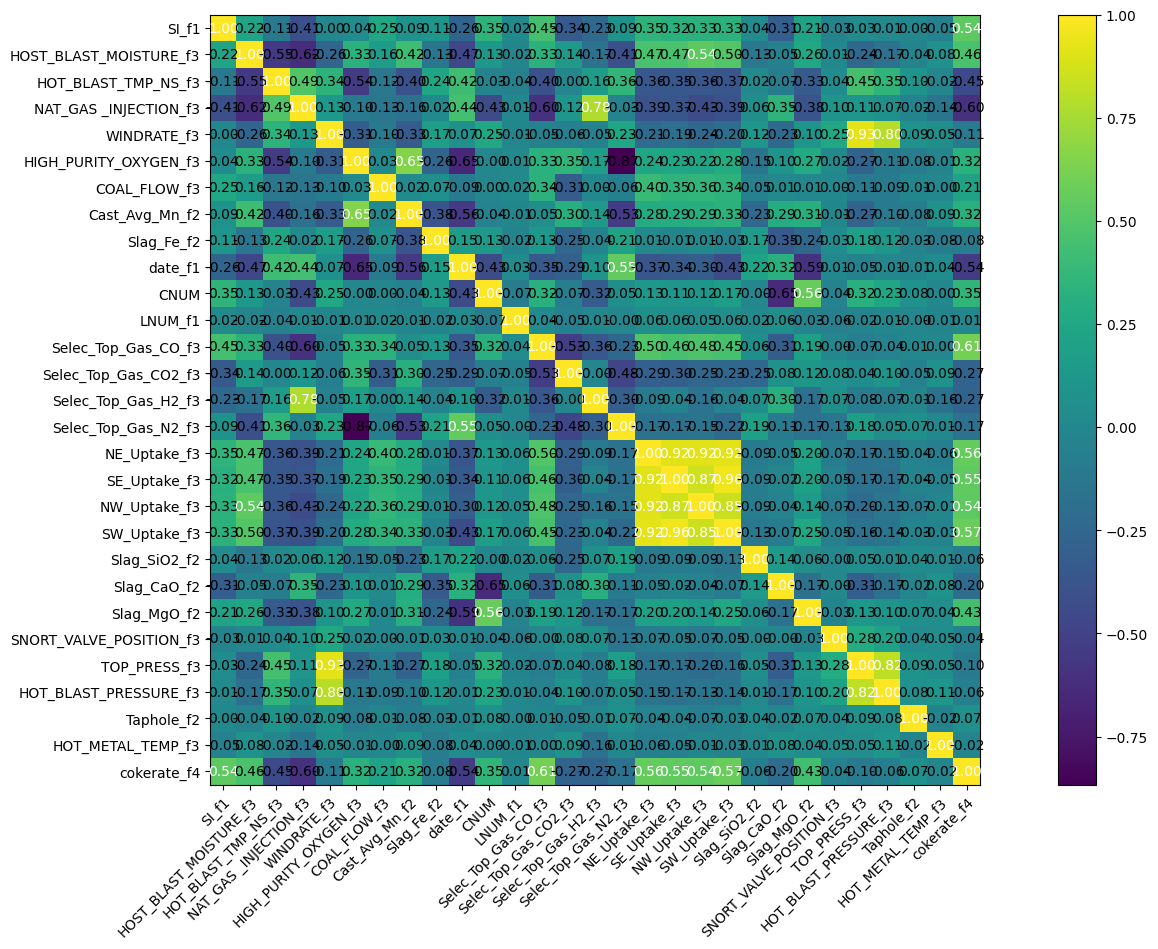

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


,SI_f1,Date_Map,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,date_f1,CNUM,LNUM_f1,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
1,0.719500,2022-01-01 00:45:00,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,44562.0,2.0,168.666667,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
2,0.710486,2022-01-01 08:43:00,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,44562.0,6.0,137.450000,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
3,0.666106,2022-01-01 10:17:00,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,44562.0,7.0,156.684211,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
4,0.675145,2022-01-01 12:40:00,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,44562.0,8.0,150.869919,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
5,0.776831,2022-01-01 15:06:00,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,44562.0,9.0,160.218182,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,0.762500,2021-12-31 13:10:00,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,44561.0,4344.0,147.500000,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,3.0,2730.002686,884.0
1391,0.646000,2021-12-31 14:41:00,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,44561.0,4345.0,147.500000,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,1.0,2730.002686,884.0
1392,0.654667,2021-12-31 16:15:00,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,44561.0,4346.0,174.000000,21.048415,18.309327,4.129862,55.140373,166.903493,181.684648,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,3.0,2730.002686,884.0
1393,0.591667,2021-12-31 17:40:00,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,44561.0,4347.0,160.000000,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,1.0,2730.002686,884.0



## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


,delta_SI,mov_avg_SI,SI_f1,Date_Map,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,sec,min,hour,day,month,year,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,CNUM,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
0,0.000000,0.000000,0.719500,2022-01-01 00:45:00,4.242439,2161.425209,9306.840913,184.818611,0.0,0,45,0,1,1,2022,0.0,0.354,0.16,2.0,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
1,0.000000,0.000000,0.710486,2022-01-01 08:43:00,4.174343,2168.238915,9336.364456,185.993447,0.0,0,43,8,1,1,2022,0.0,0.313,0.83,6.0,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
2,-0.044380,0.000000,0.666106,2022-01-01 10:17:00,4.126144,2167.779119,9419.200115,185.828474,0.0,0,17,10,1,1,2022,0.0,0.360,0.10,7.0,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
3,0.009040,0.000000,0.675145,2022-01-01 12:40:00,4.120736,2166.974740,9564.165802,185.924481,0.0,0,40,12,1,1,2022,0.0,0.319,0.34,8.0,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
4,0.101686,0.000000,0.776831,2022-01-01 15:06:00,4.120331,2166.384674,9648.247637,185.942943,0.0,0,6,15,1,1,2022,0.0,0.335,0.28,9.0,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,0.109500,0.004444,0.762500,2021-12-31 13:10:00,4.204430,2169.361647,9297.484543,185.046491,0.0,0,10,13,31,12,2021,0.0,0.343,0.30,4344.0,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,3.0,2730.002686,884.0
1390,-0.116500,0.008900,0.646000,2021-12-31 14:41:00,4.208539,2169.079601,9312.779010,185.053796,0.0,0,41,14,31,12,2021,0.0,0.324,0.30,4345.0,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,1.0,2730.002686,884.0
1391,0.008667,-0.037618,0.654667,2021-12-31 16:15:00,4.212648,2168.797556,9303.753420,185.007919,0.0,0,15,16,31,12,2021,0.0,0.325,0.16,4346.0,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,3.0,2730.002686,884.0
1392,-0.063000,-0.014340,0.591667,2021-12-31 17:40:00,4.217784,2168.444999,9333.448101,184.942435,0.0,0,40,17,31,12,2021,0.0,0.335,0.26,4347.0,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,1.0,2730.002686,884.0


In [12]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS


,delta_SI,mov_avg_SI,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,sec,min,hour,day,month,year,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,CNUM,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
0,0.000000,0.000000,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0,45,0,1,1,2022,0.0,0.354,0.16,2.0,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
1,0.000000,0.000000,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0,43,8,1,1,2022,0.0,0.313,0.83,6.0,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
2,-0.044380,0.000000,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0,17,10,1,1,2022,0.0,0.360,0.10,7.0,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
3,0.009040,0.000000,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0,40,12,1,1,2022,0.0,0.319,0.34,8.0,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
4,0.101686,0.000000,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0,6,15,1,1,2022,0.0,0.335,0.28,9.0,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,0.109500,0.004444,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0,10,13,31,12,2021,0.0,0.343,0.30,4344.0,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,3.0,2730.002686,884.0
1390,-0.116500,0.008900,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0,41,14,31,12,2021,0.0,0.324,0.30,4345.0,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,1.0,2730.002686,884.0
1391,0.008667,-0.037618,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0,15,16,31,12,2021,0.0,0.325,0.16,4346.0,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,3.0,2730.002686,884.0
1392,-0.063000,-0.014340,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0,40,17,31,12,2021,0.0,0.335,0.26,4347.0,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,1.0,2730.002686,884.0



## Pass Wrangled data to GPT experimenter


In [14]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [15]:


def function_train_rc( train_CIVS_2 ):
    model  = Time_Series_GPT.Time_Series_GPT( tsGPT_obj )   
    model  = model.to(  tsGPT_obj.device   )
    optimizer     = torch.optim.Adam(     model.parameters(), lr = tsGPT_obj.learning_rate   )
    criterion     = nn.MSELoss()
    
    ## criterion     = nn.HuberLoss(reduction='mean', delta=1.0)

    ## scheduler_steps_rc = 1  ## tsGPT_obj.max_iters * tsGPT_obj.batch_size   
    
    #scheduler = lr_scheduler.OneCycleLR(
    #    optimizer=optimizer, max_lr=0.001 , epochs=tsGPT_obj.max_iters, steps_per_epoch=tsGPT_obj.batch_size   
    #)

    #########################
    ## optimizer = torch.optim.Adam(     model.parameters(), lr = 0.01   )
    ## scheduler = lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=0.99)
    #########################

    sdtw_criterion = SoftDTW(use_cuda=True, gamma=0.1)    ## 0.1

    history       = {'loss': [], 'test_loss': [], 'loss_A': [], 'loss_B': [], 'loss_C': [],
                     'loss_SIM0':[], 'loss_SIM1':[], 'loss_SIM2':[], 'loss_SIM3':[], 
                     'loss_SIM4':[], 'loss_SIM5':[]}
    
    train_CIVS_tr, x_means, x_standard_devs    = tsGPT_obj.standardize_x_scales( train_CIVS_2 )
    train_CIVS_tr_scaled                       = ( train_CIVS_tr - x_means ) / x_standard_devs
    model.train()
    for batch_i, epoch in enumerate( range(tsGPT_obj.max_iters) ):
        xb, yb    = tsGPT_obj.get_batch( train_CIVS_tr_scaled )
        logits   = model( xb, yb )
        B, T, E  = logits.shape
        ###########################################
        
        pred           = logits.view( B, T, E )
        y_train        = yb.view(     B, T, E )
      
        ###########################################
        
        loss_change_pred = pred[   :,   :-1,  :] - pred[   :,   1:,  :]
        loss_change_real = y_train[:,   :-1,  :] - y_train[:,   1:,  :]   

        ###########################################
        
        ## loss_change_pred = loss_change_pred[ :, : 10 ]
        ## loss_change_real = loss_change_real[ :, : 10 ]
        ## T = loss_change_pred.shape[1] + 1   ## remove rc

        ###########################################
        
        loss_A = 0 ### 0.7*criterion(loss_change_pred[:,   :5,  :].reshape(B*5, E ), loss_change_real[:,   :5,  :].reshape(B*5, E ) ) 
        loss_B = 0 ### 0.2*criterion(loss_change_pred[:,  5:10, :].reshape(B*5, E ), loss_change_real[:,  5:10, :].reshape(B*5, E ) ) 
        loss_C = 0 ### 0.1*criterion( loss_change_pred[:,10:,   :].reshape(B*4, E ), loss_change_real[:, 10:,   :].reshape(B*4, E ) )

        ############################################
        
        loss_SI    = criterion( loss_change_pred.reshape(B*(T-1), E )[:, 2], loss_change_real.reshape(B*(T-1), E )[:, 2] )
        loss_all   = criterion( loss_change_pred.reshape(B*(T-1), E ),       loss_change_real.reshape(B*(T-1), E )       )

        Curve_SIMs = tsGPT_obj.func_get_Curve_SIMs( loss_change_pred.reshape(B, (T-1), E ), loss_change_real.reshape(B, (T-1), E )  )

        #######################################################
  
        loss_DTW = sdtw_criterion(loss_change_pred.reshape(B,(T-1), E )[:,:, 2:3], loss_change_real.reshape(B, (T-1),E )[:, :, 2:3] )  
        loss_DTW = loss_DTW.mean()  

        #######################################################

        loss_total = loss_DTW        ## * 0.001 + Curve_SIMs[3]     
        
        #######################################################
        
        optimizer.zero_grad( set_to_none=True )    
        loss = loss_total          
        loss.backward()
        optimizer.step()
        ## scheduler.step()
        
        #######################################################
        
        history['loss'].append(      loss.item()  )
        history['loss_A'].append( loss_SI.item()  )
        history['loss_B'].append( loss_all.item()  )
        history['loss_C'].append( 0 ) # loss_C.item()  )
        history['loss_SIM0'].append( Curve_SIMs[0] )
        history['loss_SIM1'].append( Curve_SIMs[1] )
        #history['loss_SIM2'].append( Curve_SIMs[2] )
        #history['loss_SIM3'].append( Curve_SIMs[3] )
        #history['loss_SIM4'].append( Curve_SIMs[4] )
        #history['loss_SIM5'].append( Curve_SIMs[5] )
        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item()    )
            print("seq length of pred = ",  pred.shape[1]  )
            print(Curve_SIMs)
            print("loss_SI...", [ loss_SI  ] )
            print("loss_all..", [ loss_all ] )
            print("loss_DTW..", loss_DTW     )
            ## print('Scheduler - lr:', scheduler.get_last_lr())
            print("loss_total..", loss_total )
            print("*************************")
    tsGPT_obj.plot_losses_training( history )
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled        




## Train on Train, Test on Test



## Run 1


In [16]:

'''

batch_size, len_x, len_y, dims = 8, 15, 12, 5
x = torch.rand((batch_size, len_x, dims), requires_grad=True)
y = torch.rand((batch_size, len_y, dims))
x.shape
x[1, 1, :5]

'''


'\n\nbatch_size, len_x, len_y, dims = 8, 15, 12, 5\nx = torch.rand((batch_size, len_x, dims), requires_grad=True)\ny = torch.rand((batch_size, len_y, dims))\nx.shape\nx[1, 1, :5]\n\n'

In [17]:

## x[1, 1, 2:3]


In [18]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  8.006239891052246
seq length of pred =  10
[1.4816786  1.93885669 5.31058708 9.60121103 0.90893719 0.54527761]
loss_SI... [tensor(1.8179, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.4870, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(8.0062, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(8.0062, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  0.17247611284255981
seq length of pred =  10
[0.92011869 0.86905651 1.80297669 3.22247378 0.14066789 0.17902632]
loss_SI... [tensor(0.2813, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7295, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(0.1725, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(0.1725, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.09628619998693466
seq length of pred =  10
[0.77419666 0.75027492 1.64637677 3.09502298 0.15240518 0

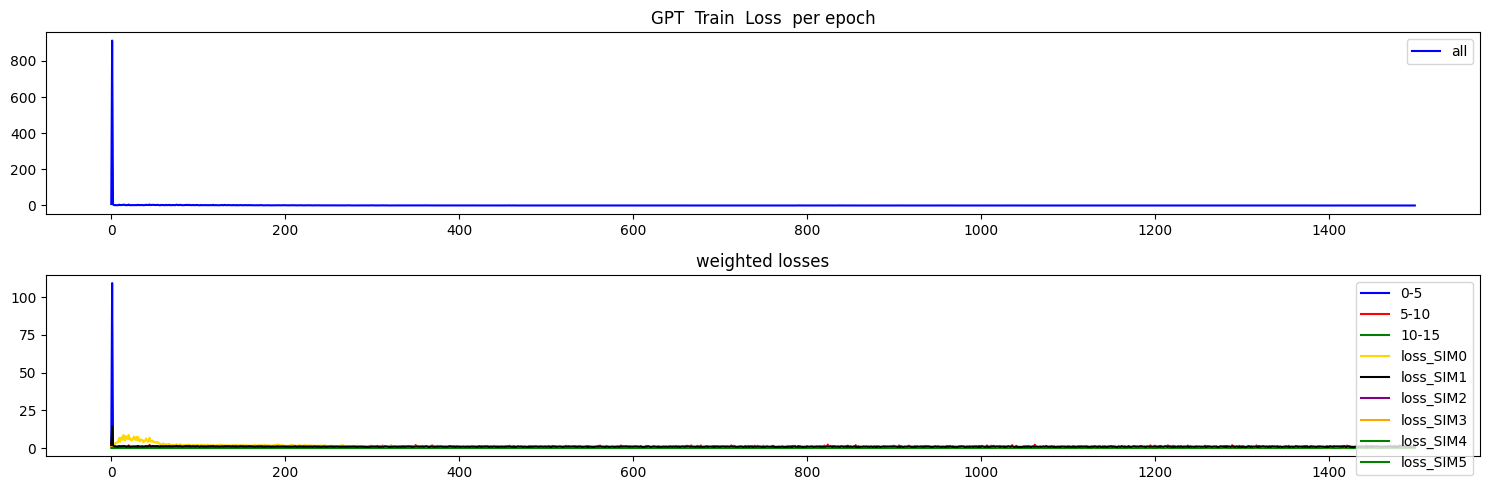

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.24966618418693542
Test MSE Loss - SI only 0-5:  0.514281153678894
Test MSE Loss - SI only 5-10:  0.06819649040699005
Test MSE Loss - SI only 10-15:  0.051886510103940964
mae, mse, rmse, mape, mspe, rse, corr
(0.37934744, 0.24966618, 0.49966606, 11.433368, 793.3829, 1.5986029)
Testing R**2 - SI only:  -1.5555309387138174
Testing R**2 - SI only:  -1.5555309387138174
Testing R**2 - All features:  0.9542347643349038
Testing R**2 - (f2) - SI full:  -7.053155637608052


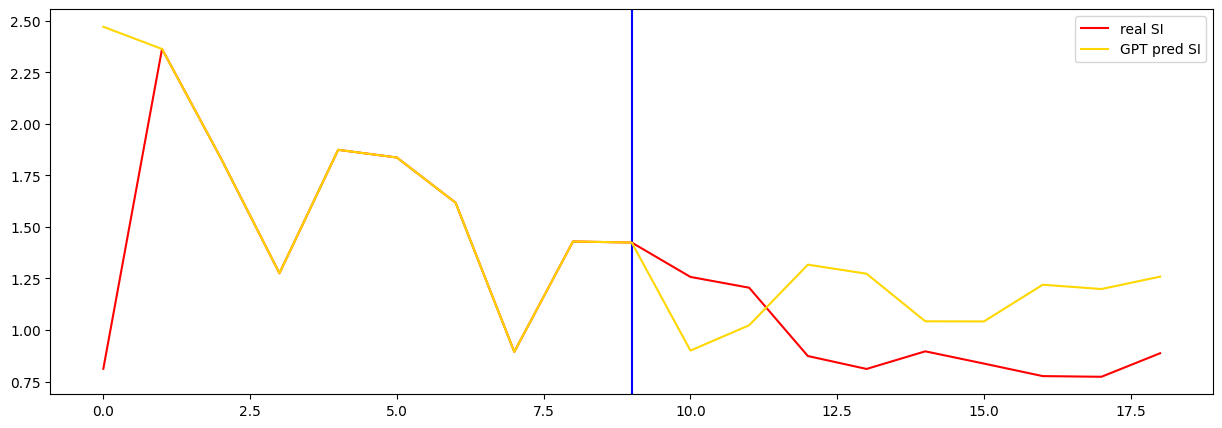

In [19]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  ) ##29-20=9


0 train loss =  4.39808464050293
seq length of pred =  10
[1.51642176 1.51250748 3.37231228 6.06994947 0.3660697  0.33721942]
loss_SI... [tensor(0.7321, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.2041, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(4.3981, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(4.3981, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  0.5905893445014954
seq length of pred =  10
[2.3263456  0.79183906 1.9894811  3.54277669 0.2099847  0.20185052]
loss_SI... [tensor(0.4200, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7784, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(0.5906, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(0.5906, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.15145373344421387
seq length of pred =  10
[1.93282331 0.66575653 1.46939486 2.73692407 0.14348346 0.15

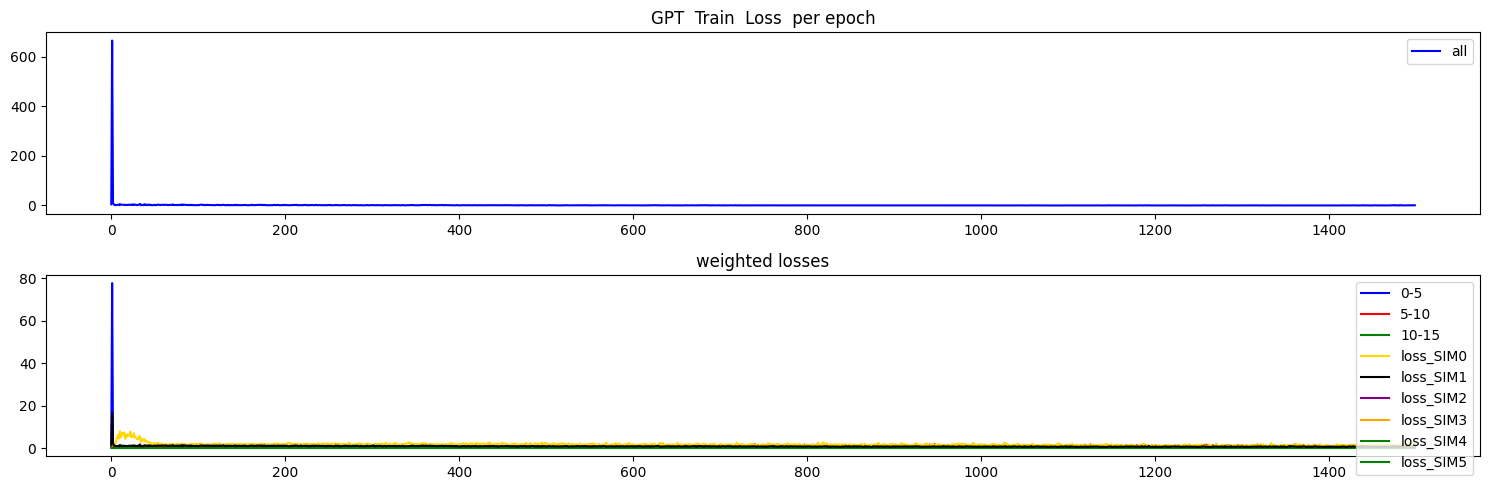

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.2734474241733551
Test MSE Loss - SI only 0-5:  0.514281153678894
Test MSE Loss - SI only 5-10:  0.0844266414642334
Test MSE Loss - SI only 10-15:  0.12602517008781433
mae, mse, rmse, mape, mspe, rse, corr
(0.4170858, 0.27344745, 0.52292204, 14.653372, 1282.3307, 1.6730067)
Testing R**2 - SI only:  -1.7989510343558863
Testing R**2 - SI only:  -1.7989510343558863
Testing R**2 - All features:  0.9837132756838063
Testing R**2 - (f2) - SI full:  -3.1912005934048153


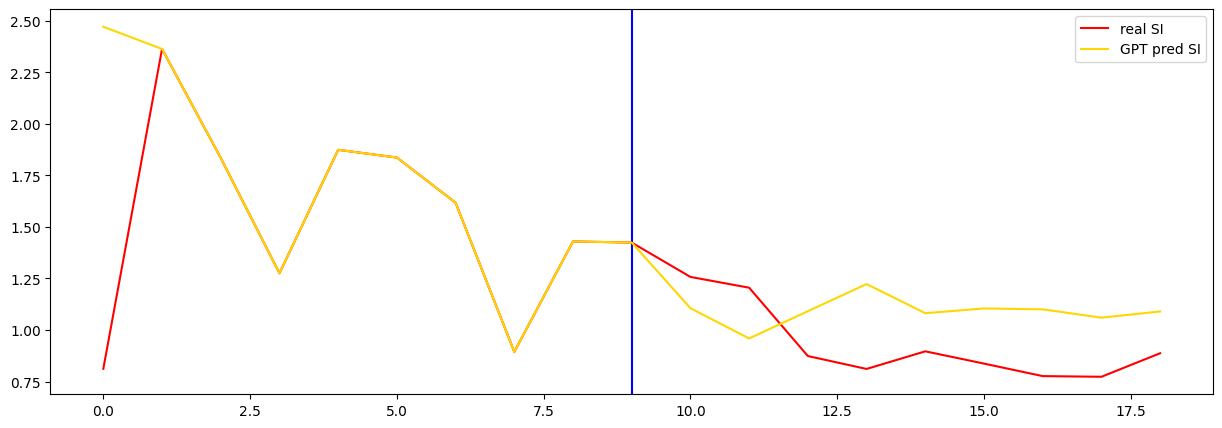

In [20]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  5.377033233642578
seq length of pred =  10
[1.62957708 1.58763136 3.6955794  7.76912954 0.62054907 0.43992978]
loss_SI... [tensor(1.2411, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.9982, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(5.3770, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(5.3770, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  1.30613112449646
seq length of pred =  10
[2.02827843 1.00900097 2.07465535 4.28882086 0.20063239 0.23849055]
loss_SI... [tensor(0.4013, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.5431, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(1.3061, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(1.3061, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  2.4867167472839355
seq length of pred =  10
[2.48021023 1.09807988 2.37653831 4.74575348 0.28542943 0.2663

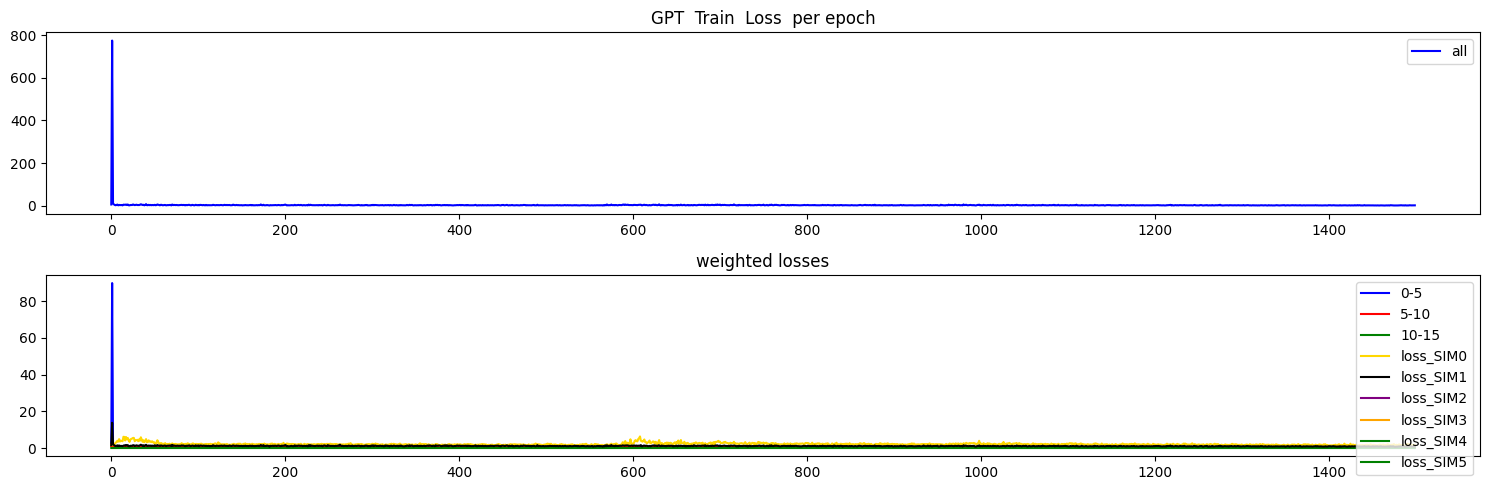

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.23957645893096924
Test MSE Loss - SI only 0-5:  0.514281153678894
Test MSE Loss - SI only 5-10:  0.05936591699719429
Test MSE Loss - SI only 10-15:  0.022376101464033127
mae, mse, rmse, mape, mspe, rse, corr
(0.34794435, 0.23957644, 0.48946548, 8.024606, 563.2184, 1.5659674)
Testing R**2 - SI only:  -1.4522545868036367
Testing R**2 - SI only:  -1.4522545868036367
Testing R**2 - All features:  0.9742816513891304
Testing R**2 - (f2) - SI full:  -14.185509188680363


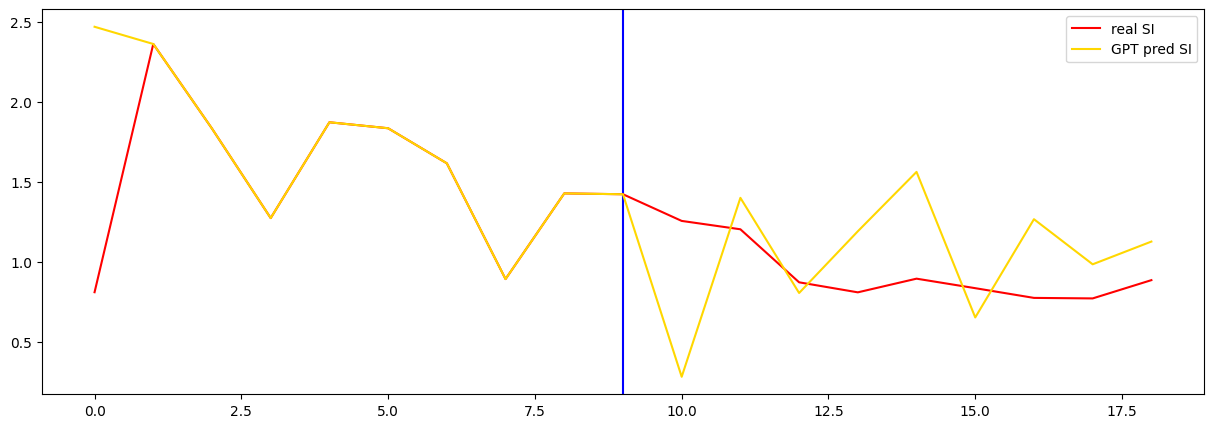

In [21]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  6.075560569763184
seq length of pred =  10
[1.54566934 1.86944726 4.44334295 8.1157364  0.70713272 0.45477225]
loss_SI... [tensor(1.4143, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.2903, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(6.0756, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(6.0756, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  1.6279858350753784
seq length of pred =  10
[1.93417937 1.14018912 2.5416858  4.64480732 0.27540523 0.25867885]
loss_SI... [tensor(0.5508, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.6075, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(1.6280, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(1.6280, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  1.4252578020095825
seq length of pred =  10
[1.55225214 0.87821031 1.81786154 3.53569051 0.15232516 0.19

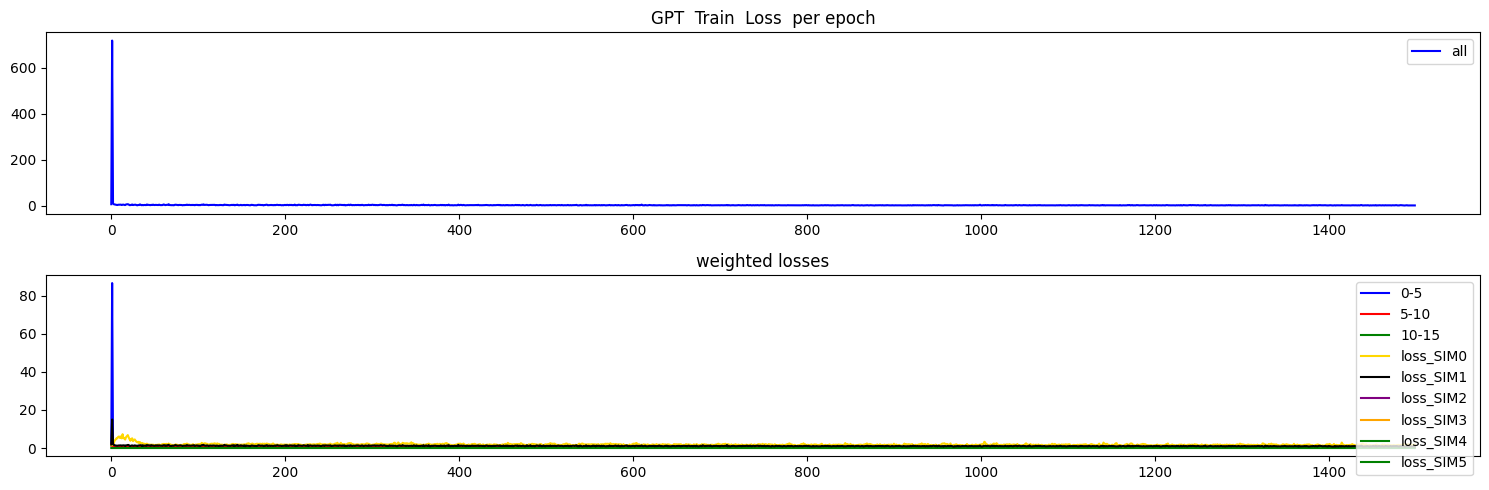

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.2413778305053711
Test MSE Loss - SI only 0-5:  0.514281153678894
Test MSE Loss - SI only 5-10:  0.0649150013923645
Test MSE Loss - SI only 10-15:  0.02367226593196392
mae, mse, rmse, mape, mspe, rse, corr
(0.35123712, 0.24137786, 0.49130222, 8.835384, 586.8478, 1.571844)
Testing R**2 - SI only:  -1.4706931615290273
Testing R**2 - SI only:  -1.4706931615290273
Testing R**2 - All features:  0.9938019251842176
Testing R**2 - (f2) - SI full:  -3.934481537359572


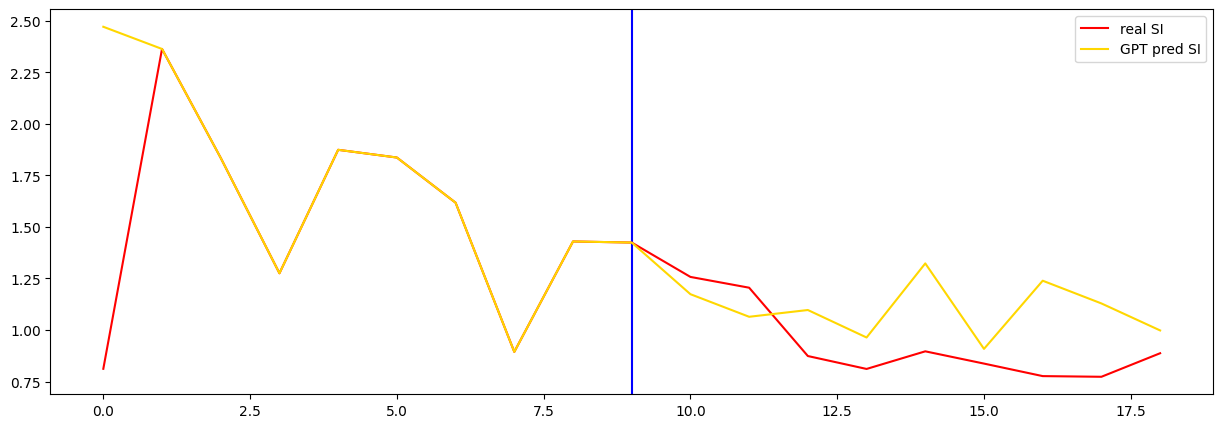

In [22]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )



## Run 2


In [23]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  6.115473747253418
seq length of pred =  10
[1.725033   1.62879275 4.06634373 7.8681969  0.68932911 0.45273812]
loss_SI... [tensor(1.3787, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.3563, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(6.1155, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(6.1155, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  0.6656947731971741
seq length of pred =  10
[0.68241238 0.92413254 2.25469804 3.78755624 0.32680801 0.2403935 ]
loss_SI... [tensor(0.6536, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8872, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(0.6657, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(0.6657, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.3539206087589264
seq length of pred =  10
[0.60624366 0.9415267  2.56155324 4.15520509 0.39213204 0.26

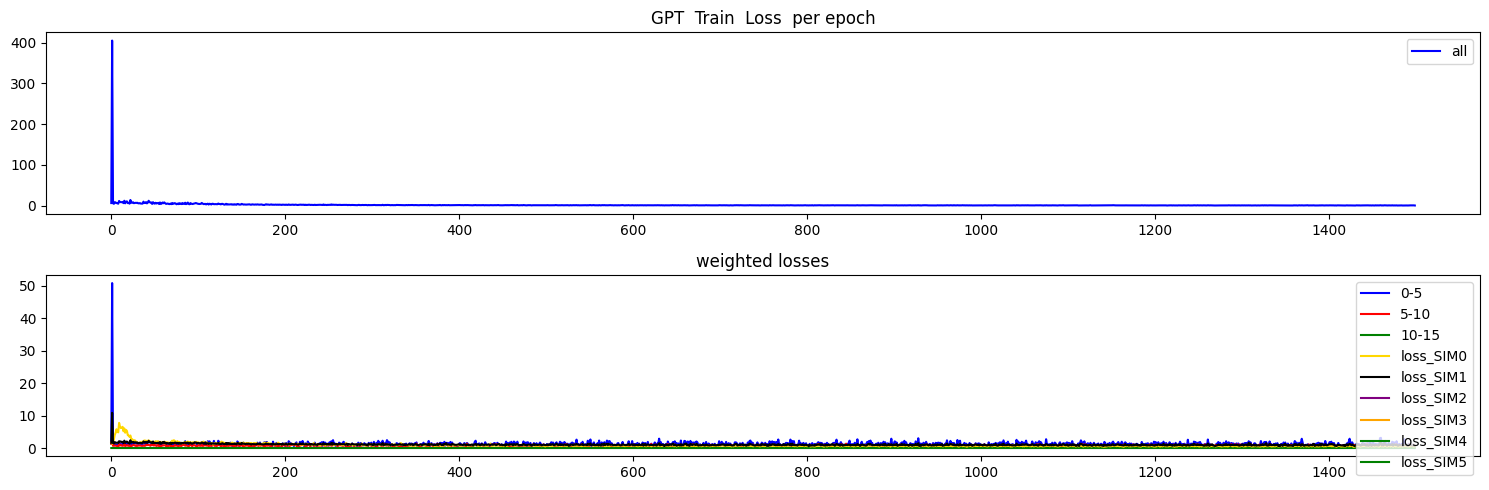

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.024981072172522545
Test MSE Loss - SI only 0-5:  0.025845784693956375
Test MSE Loss - SI only 5-10:  0.017906807363033295
Test MSE Loss - SI only 10-15:  0.03853357583284378
mae, mse, rmse, mape, mspe, rse, corr
(0.13621089, 0.024981072, 0.15805402, 2.1807847, 14.2581835, 1.2120779)
Testing R**2 - SI only:  -0.46913302158902104
Testing R**2 - SI only:  -0.46913302158902104
Testing R**2 - All features:  0.9983930404011078
Testing R**2 - (f2) - SI full:  -0.42266247501298015


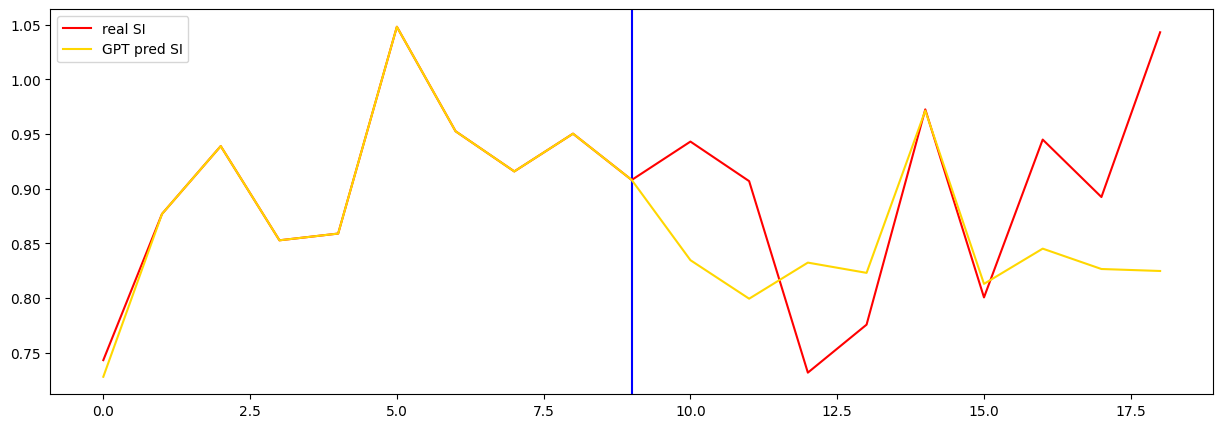

In [24]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


0 train loss =  6.319466590881348
seq length of pred =  10
[1.49716216 1.7160206  3.00374481 8.27188868 0.64965856 0.47365282]
loss_SI... [tensor(1.2993, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.1099, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(6.3195, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(6.3195, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  1.0334303379058838
seq length of pred =  10
[1.46287333 0.79538257 1.70896921 3.01468909 0.10470861 0.16748273]
loss_SI... [tensor(0.2094, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.5041, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(1.0334, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(1.0334, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  1.114636778831482
seq length of pred =  10
[1.20290443 0.7993933  1.52268383 2.84623719 0.09561487 0.158

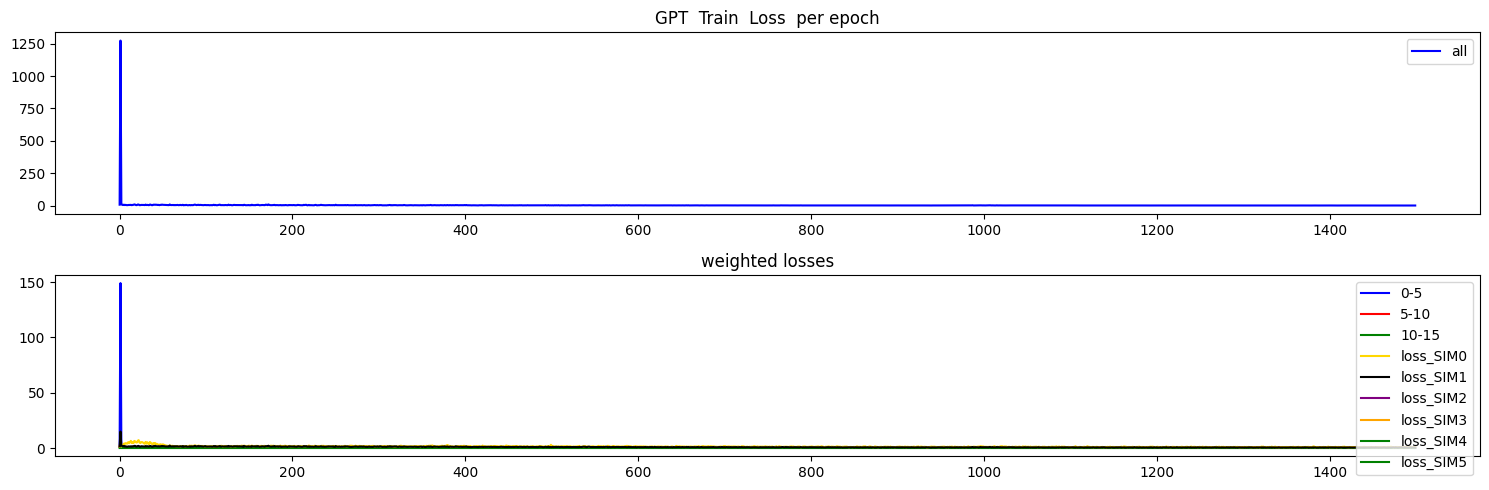

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.02323186956346035
Test MSE Loss - SI only 0-5:  0.025845784693956375
Test MSE Loss - SI only 5-10:  0.015659933909773827
Test MSE Loss - SI only 10-15:  0.03413347154855728
mae, mse, rmse, mape, mspe, rse, corr
(0.13154545, 0.023231866, 0.15242003, 2.0930402, 14.069737, 1.1688722)
Testing R**2 - SI only:  -0.366262533833027
Testing R**2 - SI only:  -0.366262533833027
Testing R**2 - All features:  0.9971532514884947
Testing R**2 - (f2) - SI full:  -1.0685448257572636


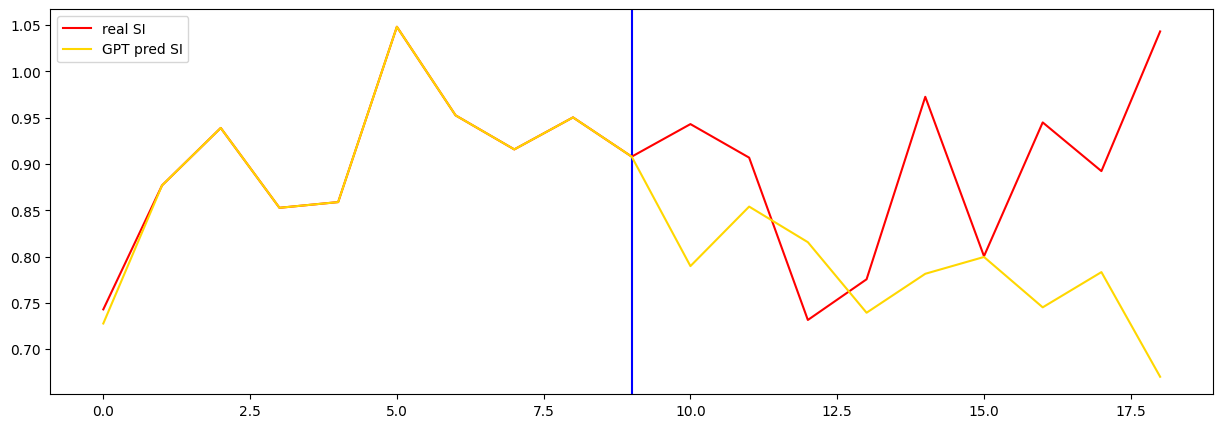

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  14.838465690612793
seq length of pred =  10
[ 1.38495519  2.76376451  5.14821259 10.76466858  1.26831625  0.62226869]
loss_SI... [tensor(2.5366, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.3394, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(14.8385, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(14.8385, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  2.51275372505188
seq length of pred =  10
[1.23269277 1.24186383 2.72055765 4.89356747 0.31676519 0.27545923]
loss_SI... [tensor(0.6335, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7853, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(2.5128, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(2.5128, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.5960429906845093
seq length of pred =  10
[1.06536295 0.72542862 1.85497771 2.90812313 0.145542

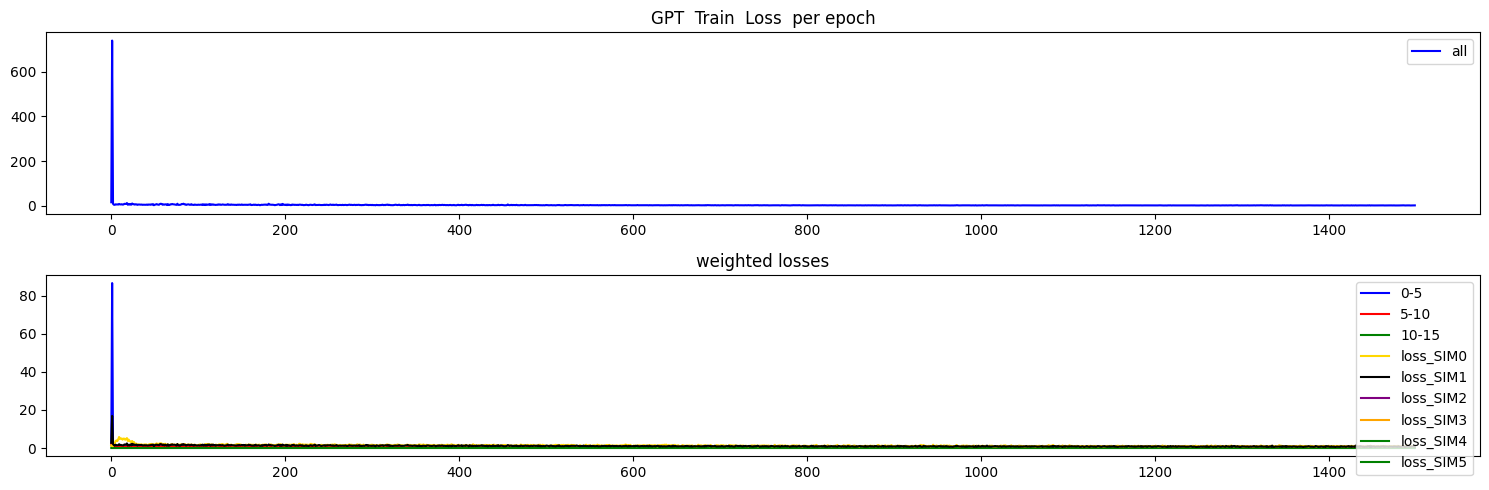

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.039495423436164856
Test MSE Loss - SI only 0-5:  0.025845777243375778
Test MSE Loss - SI only 5-10:  0.03310081362724304
Test MSE Loss - SI only 10-15:  0.0784941166639328
mae, mse, rmse, mape, mspe, rse, corr
(0.15386038, 0.039495427, 0.19873457, 2.4902773, 16.034473, 1.5240471)
Testing R**2 - SI only:  -1.32271983506736
Testing R**2 - SI only:  -1.32271983506736
Testing R**2 - All features:  0.9394048728744251
Testing R**2 - (f2) - SI full:  -5.312620429991174


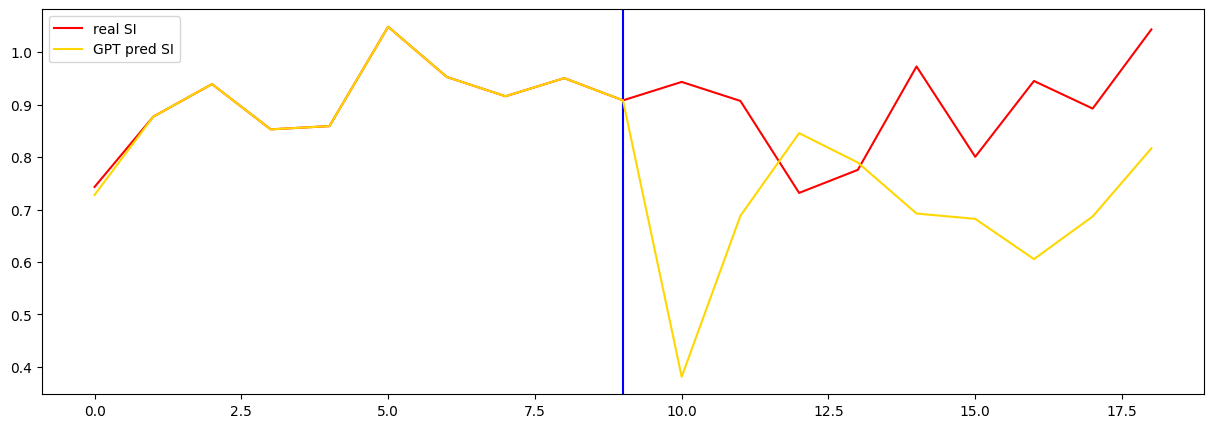

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  11.444640159606934
seq length of pred =  10
[ 1.44497993  2.20423883  4.03377071 10.7573044   1.15432431  0.62392231]
loss_SI... [tensor(2.3086, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.1706, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(11.4446, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(11.4446, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  2.465474843978882
seq length of pred =  10
[1.6876243  1.34318035 3.50003325 5.79255722 0.37164704 0.3241699 ]
loss_SI... [tensor(0.7433, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8515, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(2.4655, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(2.4655, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  1.950225830078125
seq length of pred =  10
[1.40454354 1.10325347 2.33448665 4.61197918 0.265628

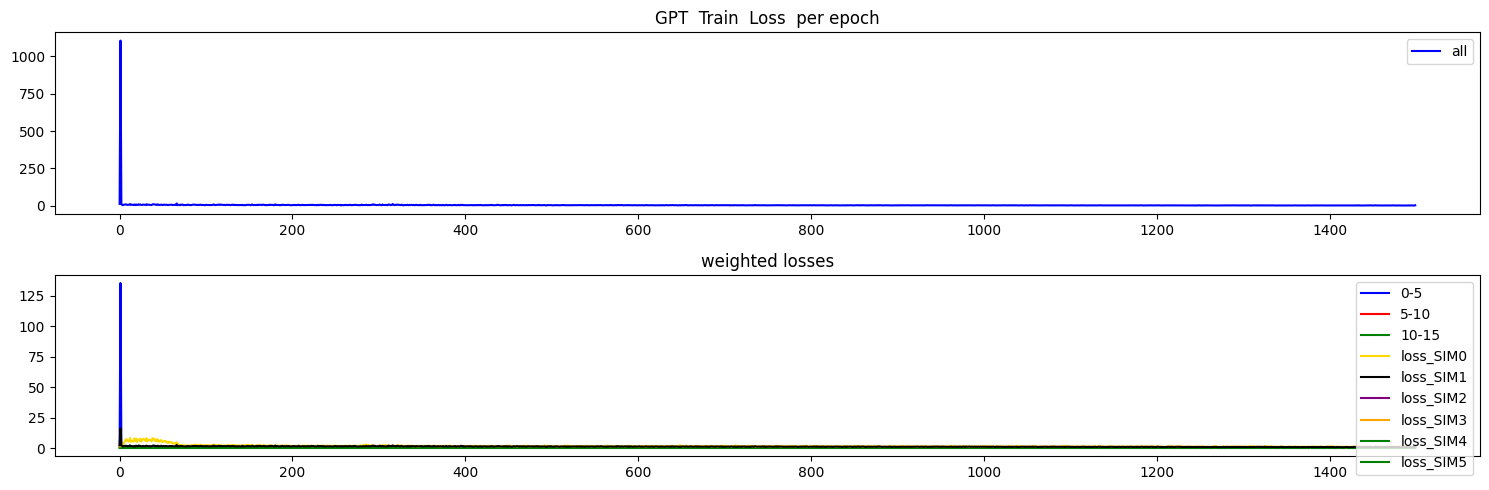

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.032597530633211136
Test MSE Loss - SI only 0-5:  0.025845784693956375
Test MSE Loss - SI only 5-10:  0.02775641717016697
Test MSE Loss - SI only 10-15:  0.05762650445103645
mae, mse, rmse, mape, mspe, rse, corr
(0.14727128, 0.03259753, 0.18054786, 2.4134836, 15.721469, 1.3845778)
Testing R**2 - SI only:  -0.9170556879197922
Testing R**2 - SI only:  -0.9170556879197922
Testing R**2 - All features:  0.9908950590531628
Testing R**2 - (f2) - SI full:  -6.469369185725085


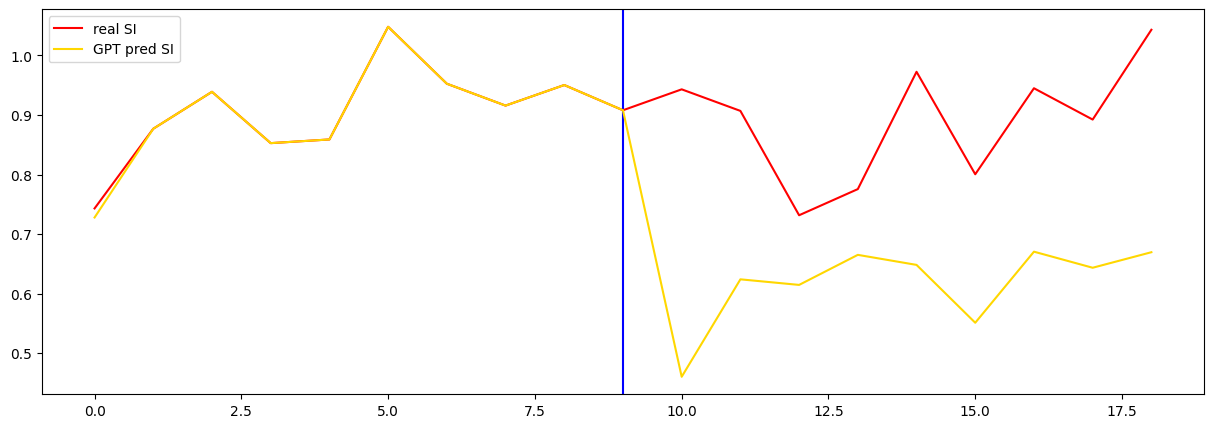

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )



## Run 3


In [28]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  18.255603790283203
seq length of pred =  10
[ 1.42019338  2.64447621  5.29920127 12.6167319   1.79174104  0.75632216]
loss_SI... [tensor(3.5835, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.2053, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(18.2556, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(18.2556, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  1.0706875324249268
seq length of pred =  10
[1.00801334 0.92742442 2.19831958 4.30557641 0.47610631 0.30055086]
loss_SI... [tensor(0.9522, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8105, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(1.0707, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(1.0707, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.5470219254493713
seq length of pred =  10
[0.59869919 0.99612595 2.32945267 4.40421621 0.4051

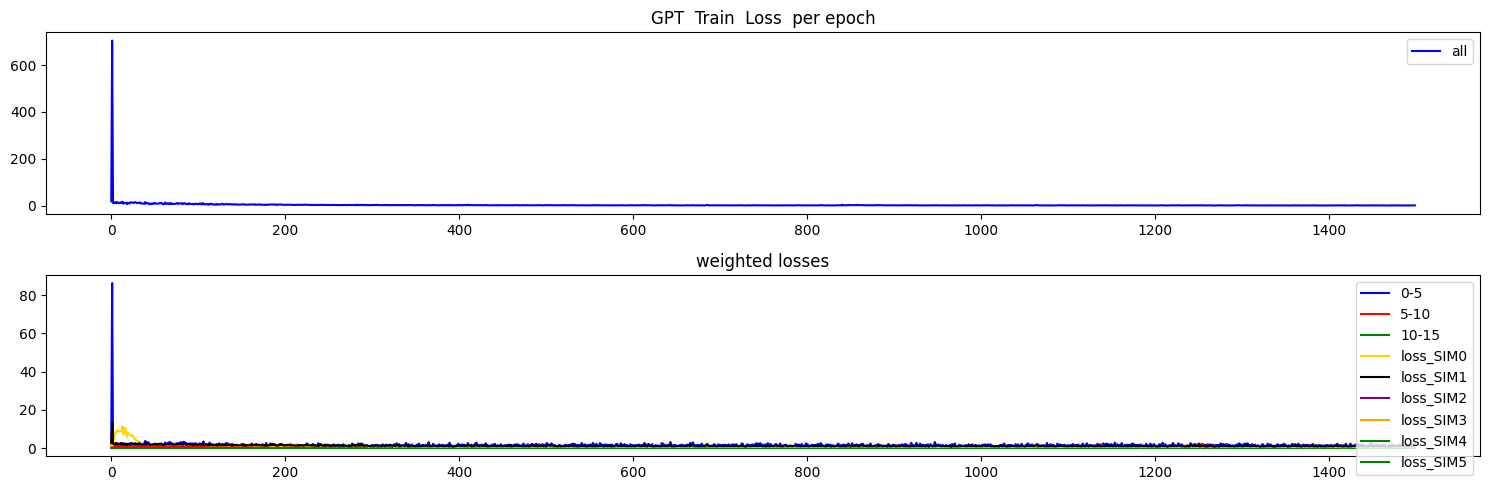

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.10301573574542999
Test MSE Loss - SI only 0-5:  0.255085289478302
Test MSE Loss - SI only 5-10:  0.061906684190034866
Test MSE Loss - SI only 10-15:  0.028076473623514175
mae, mse, rmse, mape, mspe, rse, corr
(0.22251262, 0.103015736, 0.32096064, 25.335709, 9671.138, 1.5335385)
Testing R**2 - SI only:  -1.351740551962699
Testing R**2 - SI only:  -1.351740551962699
Testing R**2 - All features:  0.995867704790333
Testing R**2 - (f2) - SI full:  -1.1908765350902275


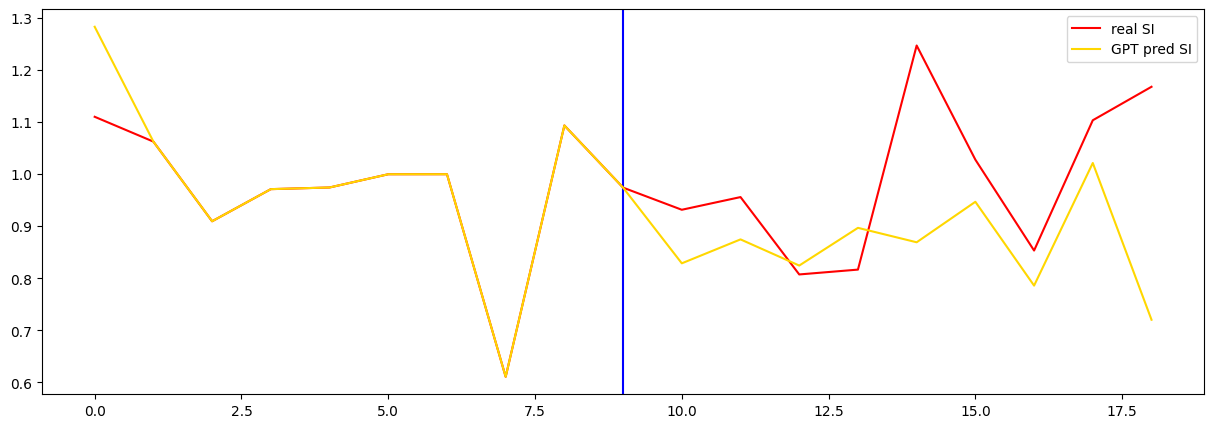

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


0 train loss =  10.003779411315918
seq length of pred =  10
[ 1.56515706  2.10382414  6.17511141 10.1183131   1.17824143  0.59713516]
loss_SI... [tensor(2.3565, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.3896, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(10.0038, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(10.0038, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  5.754434108734131
seq length of pred =  10
[2.28456834 1.62130129 3.63986634 6.64109773 0.52092578 0.37532461]
loss_SI... [tensor(1.0419, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8337, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(5.7544, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(5.7544, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  5.77957010269165
seq length of pred =  10
[1.69749528 1.65501748 4.10366328 7.07184322 0.5040120

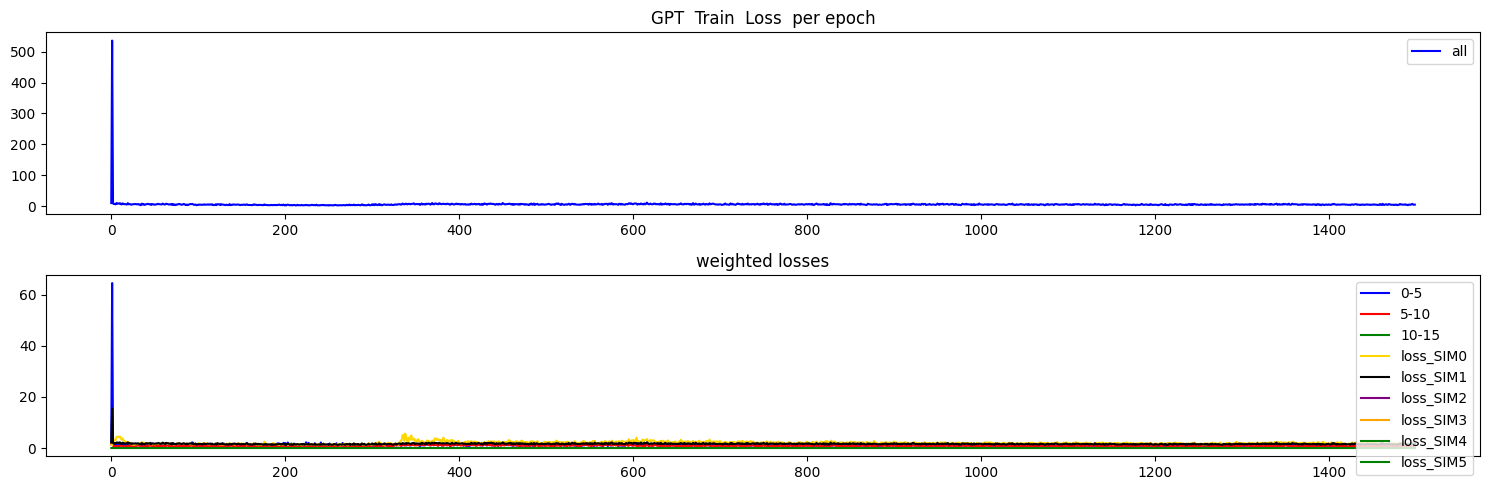

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.09993495792150497
Test MSE Loss - SI only 0-5:  0.255085289478302
Test MSE Loss - SI only 5-10:  0.039649613201618195
Test MSE Loss - SI only 10-15:  0.038626570254564285
mae, mse, rmse, mape, mspe, rse, corr
(0.22968869, 0.09993495, 0.3161249, 25.314688, 9670.047, 1.5104337)
Testing R**2 - SI only:  -1.28140971240654
Testing R**2 - SI only:  -1.28140971240654
Testing R**2 - All features:  0.9960893320196433
Testing R**2 - (f2) - SI full:  -1.983964503329247


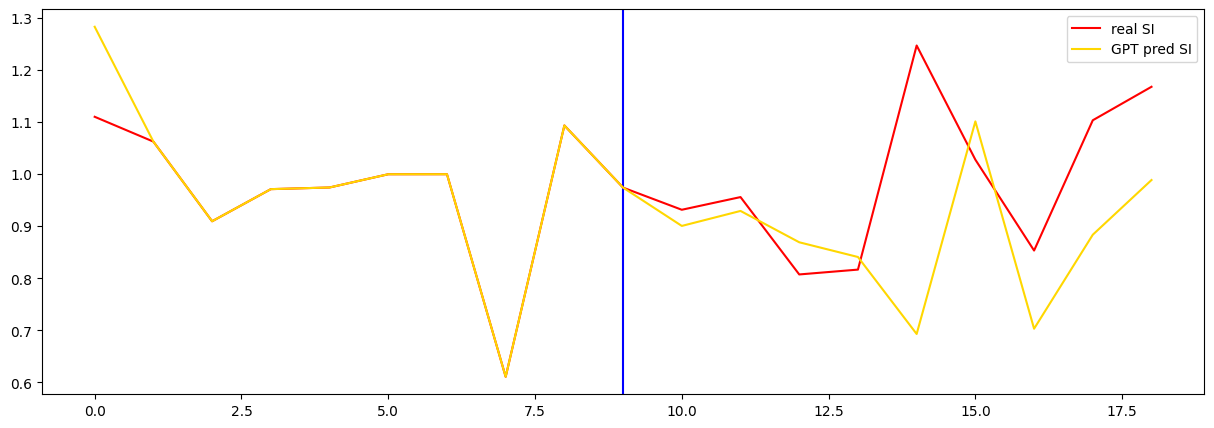

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


0 train loss =  9.010078430175781
seq length of pred =  10
[1.2786038  2.07074703 4.47491585 9.20799133 0.96102855 0.54153183]
loss_SI... [tensor(1.9221, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.1234, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(9.0101, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(9.0101, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  2.0327672958374023
seq length of pred =  10
[1.32962714 1.20904095 2.55833923 5.24885883 0.34426746 0.3007677 ]
loss_SI... [tensor(0.6885, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7385, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(2.0328, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(2.0328, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.9031055569648743
seq length of pred =  10
[0.900667   0.70205412 1.77524671 2.95066592 0.09669198 0.16

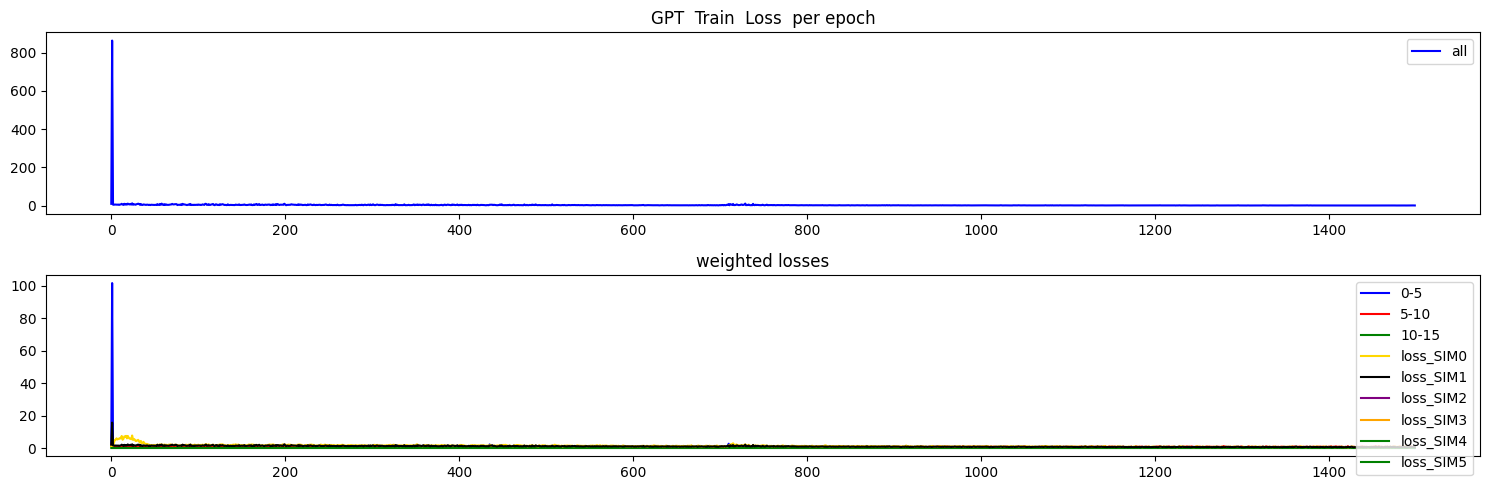

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.10016903281211853
Test MSE Loss - SI only 0-5:  0.255085289478302
Test MSE Loss - SI only 5-10:  0.042129985988140106
Test MSE Loss - SI only 10-15:  0.03703569620847702
mae, mse, rmse, mape, mspe, rse, corr
(0.2299681, 0.10016904, 0.31649494, 25.495619, 9673.205, 1.5122014)
Testing R**2 - SI only:  -1.2867533413902001
Testing R**2 - SI only:  -1.2867533413902001
Testing R**2 - All features:  0.9928367610588126
Testing R**2 - (f2) - SI full:  -13.064863418454692


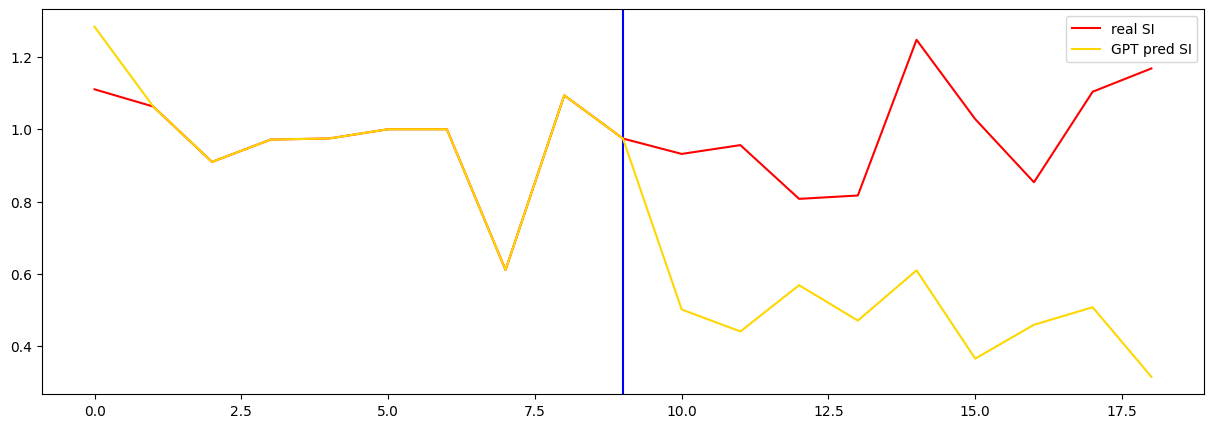

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  9.796096801757812
seq length of pred =  10
[ 1.41518829  2.21532692  4.64036543 10.38037947  1.12838146  0.60512428]
loss_SI... [tensor(2.2568, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.0368, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(9.7961, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(9.7961, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  2.289503335952759
seq length of pred =  10
[1.19866176 1.10926362 2.41711886 4.2344992  0.17479504 0.23524996]
loss_SI... [tensor(0.3496, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.5917, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(2.2895, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(2.2895, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.5867693424224854
seq length of pred =  10
[0.9819366  0.61215133 1.28964634 2.45866264 0.06059735

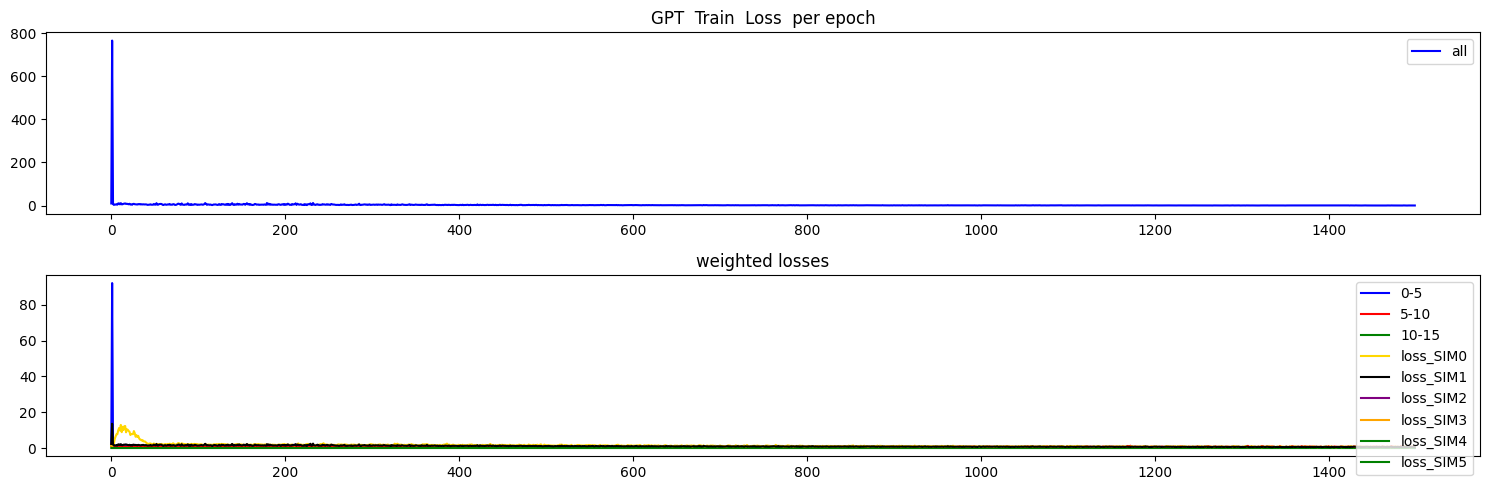

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.09866944700479507
Test MSE Loss - SI only 0-5:  0.255085289478302
Test MSE Loss - SI only 5-10:  0.04060232266783714
Test MSE Loss - SI only 10-15:  0.03286496177315712
mae, mse, rmse, mape, mspe, rse, corr
(0.21985506, 0.098669454, 0.31411695, 25.059494, 9668.783, 1.5008397)
Testing R**2 - SI only:  -1.252519615511805
Testing R**2 - SI only:  -1.252519615511805
Testing R**2 - All features:  0.9961670602051286
Testing R**2 - (f2) - SI full:  -3.010913994033218


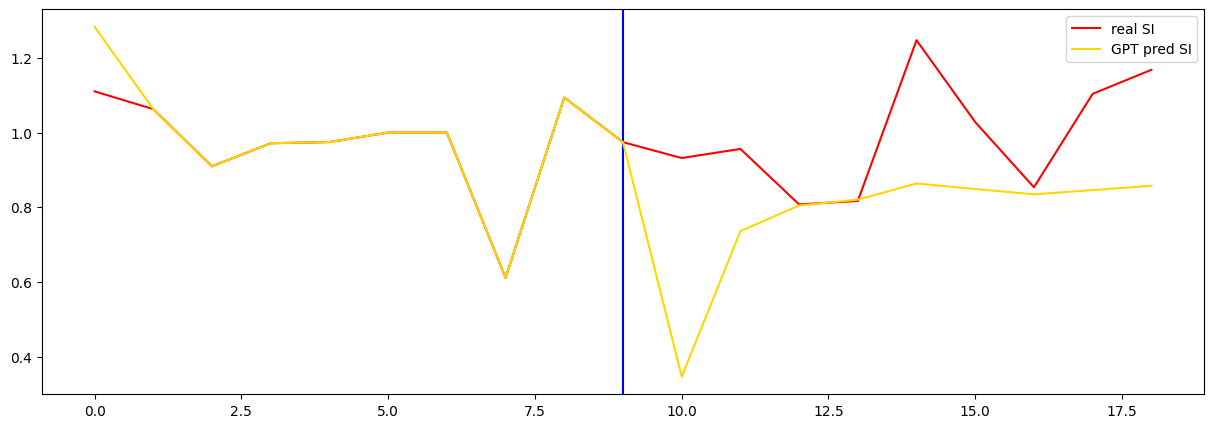

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )



## Run 4


In [33]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  8.444281578063965
seq length of pred =  10
[1.41662648 2.09663291 5.361873   9.51704503 0.9222155  0.54842175]
loss_SI... [tensor(1.8444, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.2558, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(8.4443, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(8.4443, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  0.4211094379425049
seq length of pred =  10
[0.74746828 0.83646953 1.59681481 3.06888042 0.17118052 0.1796351 ]
loss_SI... [tensor(0.3424, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8360, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(0.4211, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(0.4211, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.35641348361968994
seq length of pred =  10
[0.68246494 0.86516054 1.91655161 3.87079027 0.31989046 0.2

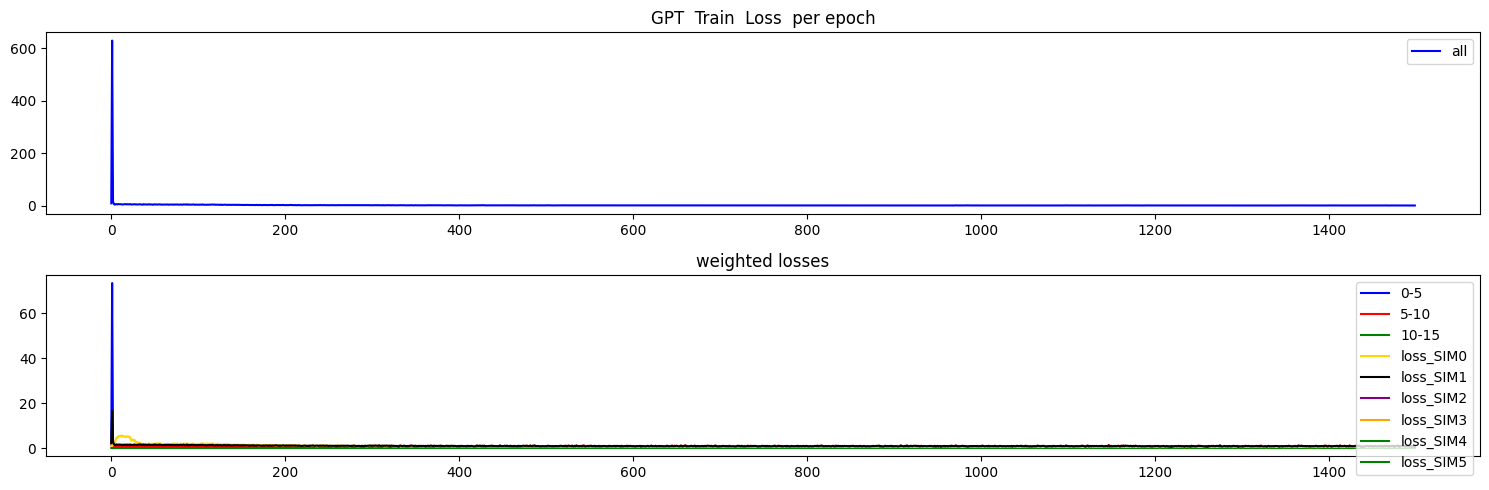

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.08453358709812164
Test MSE Loss - SI only 0-5:  0.07429090887308121
Test MSE Loss - SI only 5-10:  0.09933286905288696
Test MSE Loss - SI only 10-15:  0.13207289576530457
mae, mse, rmse, mape, mspe, rse, corr
(0.2514308, 0.08453358, 0.2907466, 9.294644, 957.1058, 1.150296)
Testing R**2 - SI only:  -0.3231811727710099
Testing R**2 - SI only:  -0.3231811727710099
Testing R**2 - All features:  0.9873893303261705
Testing R**2 - (f2) - SI full:  -0.12476687543888199


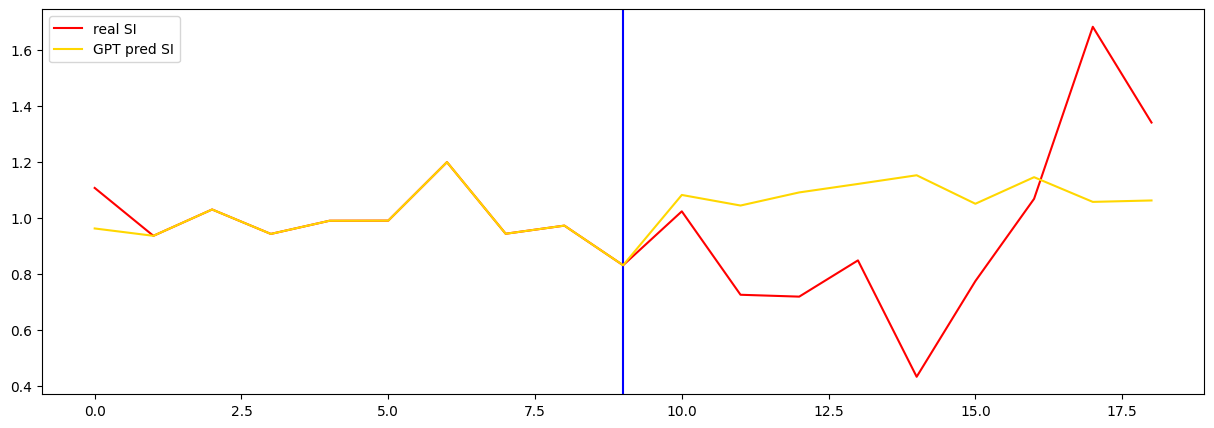

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


0 train loss =  8.676544189453125
seq length of pred =  10
[1.31608395 1.91367616 5.13210843 9.85303827 1.1047775  0.59029751]
loss_SI... [tensor(2.2096, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.3334, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(8.6765, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(8.6765, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  1.9809082746505737
seq length of pred =  10
[1.15447382 1.25529927 2.66921271 5.32867131 0.31866872 0.3011464 ]
loss_SI... [tensor(0.6373, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8350, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(1.9809, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(1.9809, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.9987521171569824
seq length of pred =  10
[1.06933562 0.91983826 2.03402079 4.23229519 0.2761809  0.25

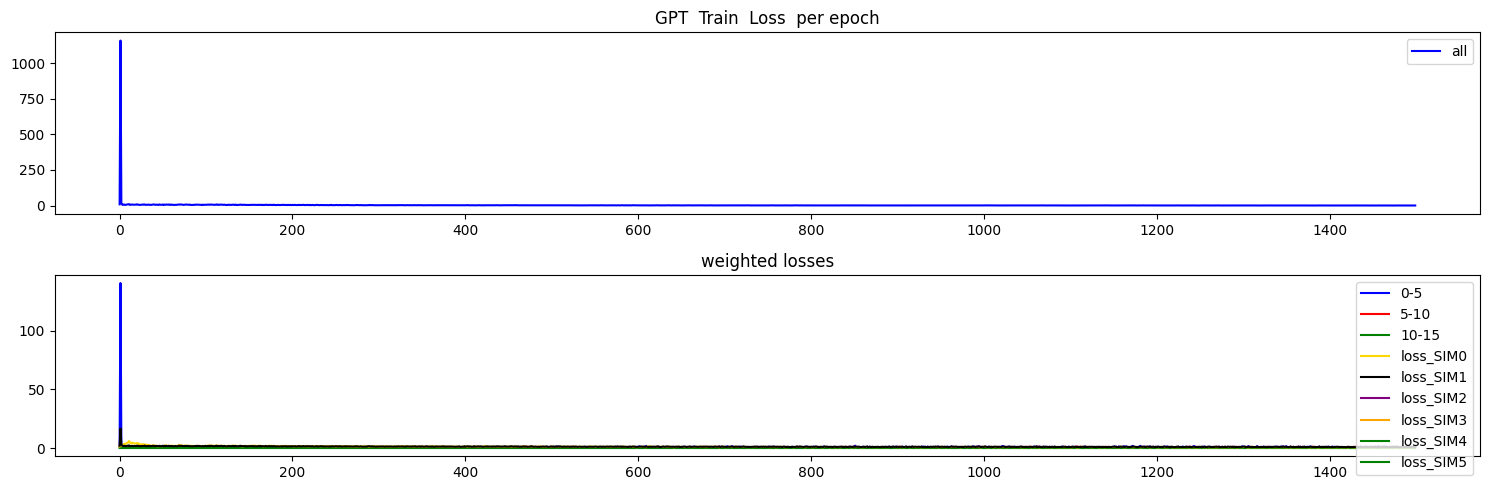

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.09201443940401077
Test MSE Loss - SI only 0-5:  0.07429090887308121
Test MSE Loss - SI only 5-10:  0.12888064980506897
Test MSE Loss - SI only 10-15:  0.1309523731470108
mae, mse, rmse, mape, mspe, rse, corr
(0.2595784, 0.09201445, 0.30333883, 10.092346, 982.887, 1.2001156)
Testing R**2 - SI only:  -0.4402770979726738
Testing R**2 - SI only:  -0.4402770979726738
Testing R**2 - All features:  0.9877220197921152
Testing R**2 - (f2) - SI full:  -0.15418699923613532


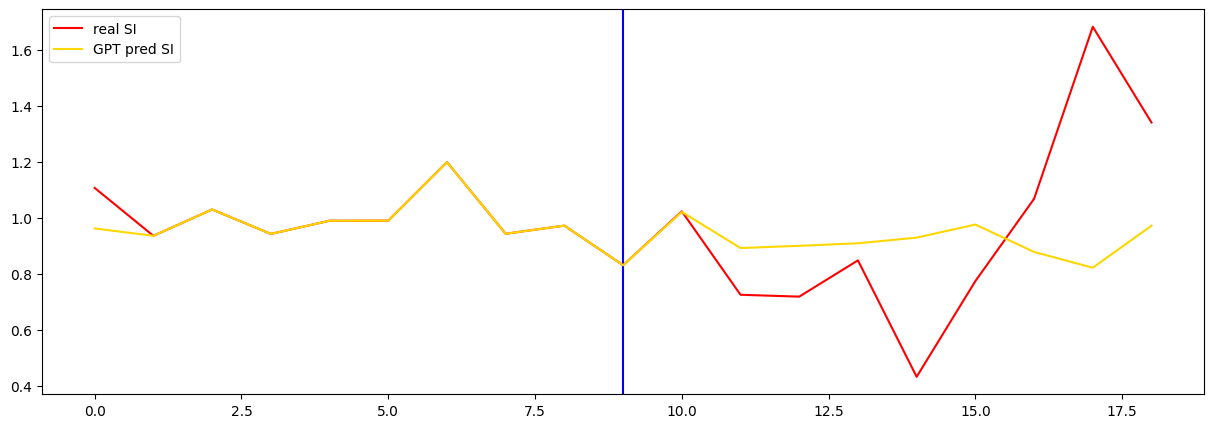

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  7.36765193939209
seq length of pred =  10
[1.96509385 1.9203016  4.73391535 9.37456947 0.89436356 0.53876017]
loss_SI... [tensor(1.7887, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.3768, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(7.3677, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(7.3677, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  2.6610424518585205
seq length of pred =  10
[1.22747828 1.17336544 3.09773285 5.309084   0.35206283 0.30746914]
loss_SI... [tensor(0.7041, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7133, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(2.6610, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(2.6610, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.8871099352836609
seq length of pred =  10
[0.99809438 0.87303904 2.11115409 3.79274875 0.39475491 0.253

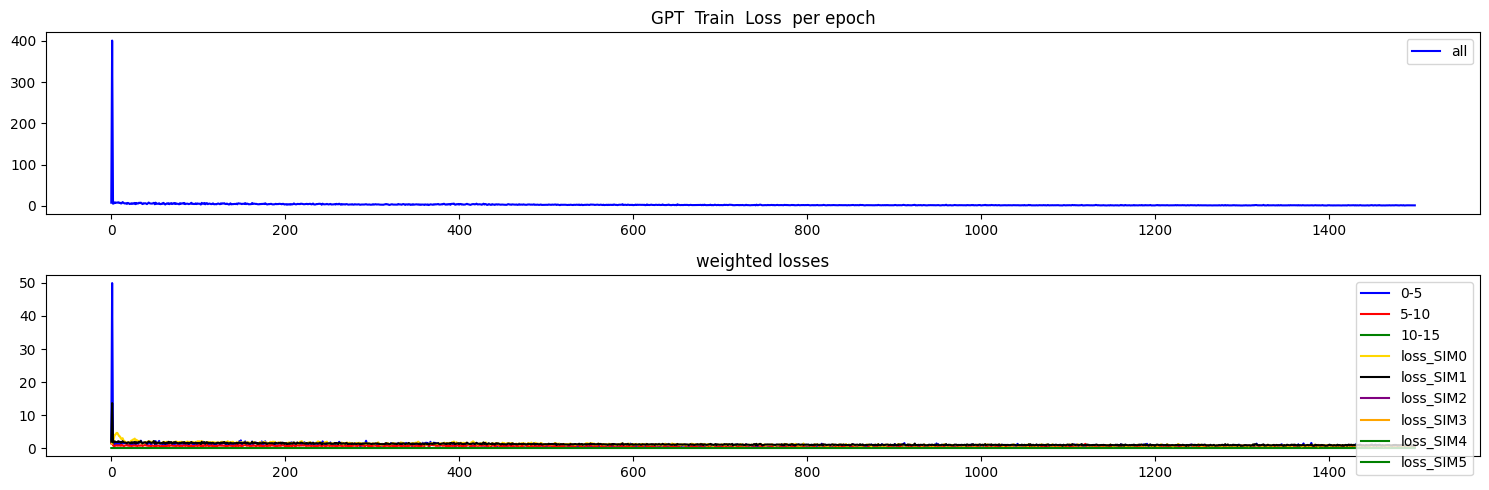

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.08820189535617828
Test MSE Loss - SI only 0-5:  0.07429090142250061
Test MSE Loss - SI only 5-10:  0.06719200313091278
Test MSE Loss - SI only 10-15:  0.1781533658504486
mae, mse, rmse, mape, mspe, rse, corr
(0.25342754, 0.088201895, 0.29698804, 9.35462, 957.861, 1.1749896)
Testing R**2 - SI only:  -0.3806004079417127
Testing R**2 - SI only:  -0.3806004079417127
Testing R**2 - All features:  0.9748656667797164
Testing R**2 - (f2) - SI full:  -0.47414870624131256


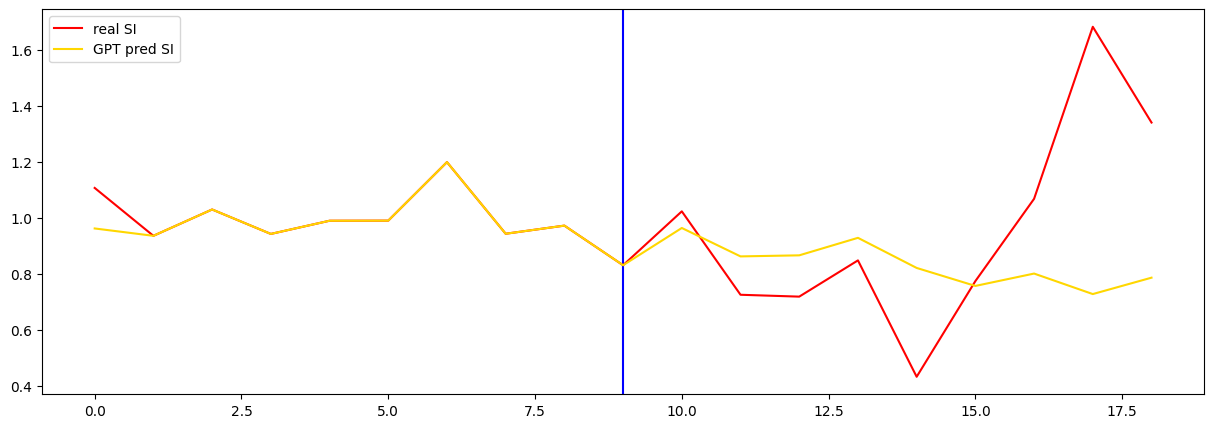

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  3.815776824951172
seq length of pred =  10
[1.53315142 1.40948673 3.1324518  7.28313665 0.51555877 0.41693189]
loss_SI... [tensor(1.0311, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.1227, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(3.8158, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(3.8158, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  2.0412802696228027
seq length of pred =  10
[1.65111808 1.0697938  2.38739053 4.96863798 0.26262545 0.28082065]
loss_SI... [tensor(0.5253, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.5233, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(2.0413, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(2.0413, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  2.2551016807556152
seq length of pred =  10
[1.61001276 1.00032353 2.38455549 4.35429777 0.18168579 0.24

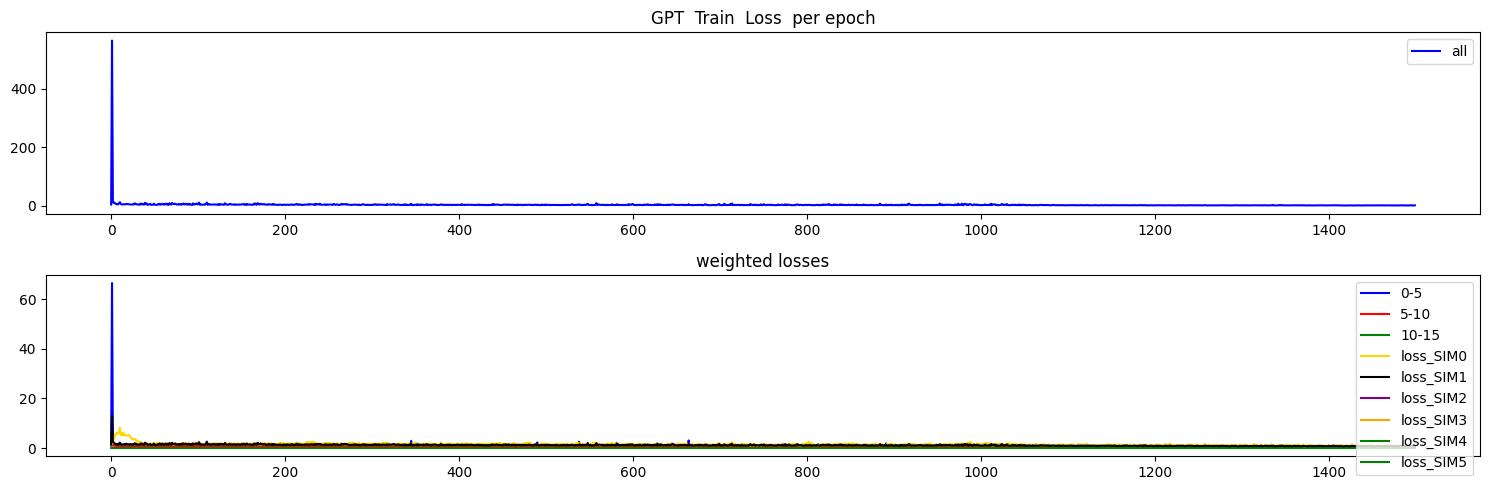

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.08908449858427048
Test MSE Loss - SI only 0-5:  0.07429090887308121
Test MSE Loss - SI only 5-10:  0.06493355333805084
Test MSE Loss - SI only 10-15:  0.183765709400177
mae, mse, rmse, mape, mspe, rse, corr
(0.25456247, 0.0890845, 0.29847026, 9.344984, 957.53906, 1.1808538)
Testing R**2 - SI only:  -0.3944155936803948
Testing R**2 - SI only:  -0.3944155936803948
Testing R**2 - All features:  0.9821320691726743
Testing R**2 - (f2) - SI full:  -0.11810078990131734


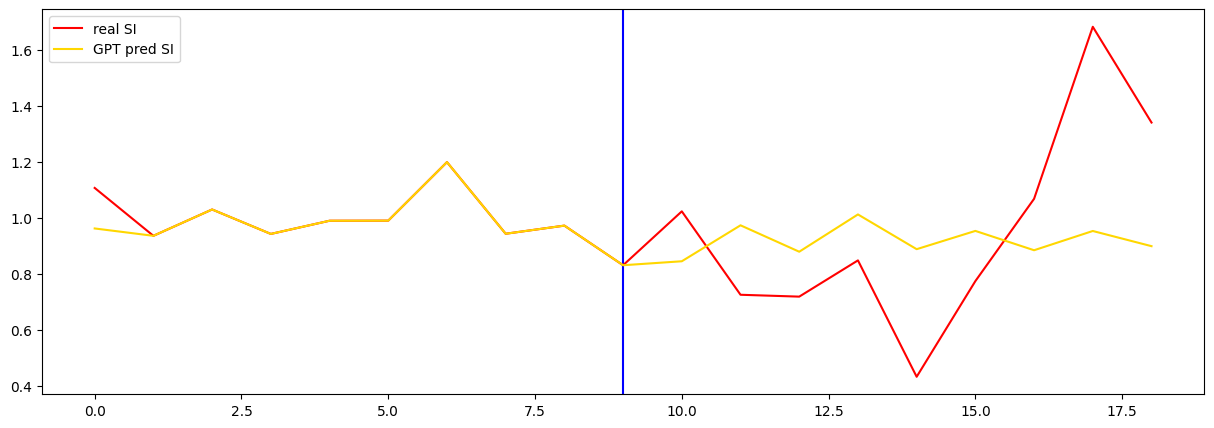

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )



## Run 5


In [38]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  16.4213809967041
seq length of pred =  10
[ 1.93691031  2.81495137  6.88888246 12.50570498  1.62115744  0.7233889 ]
loss_SI... [tensor(3.2423, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.3561, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(16.4214, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(16.4214, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  1.7655386924743652
seq length of pred =  10
[0.77385126 1.21343629 3.83331539 6.15727693 0.68323226 0.3924582 ]
loss_SI... [tensor(1.3665, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.1801, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(1.7655, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(1.7655, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.8173171281814575
seq length of pred =  10
[0.7174488  1.08043373 3.68305165 5.70529192 1.007245

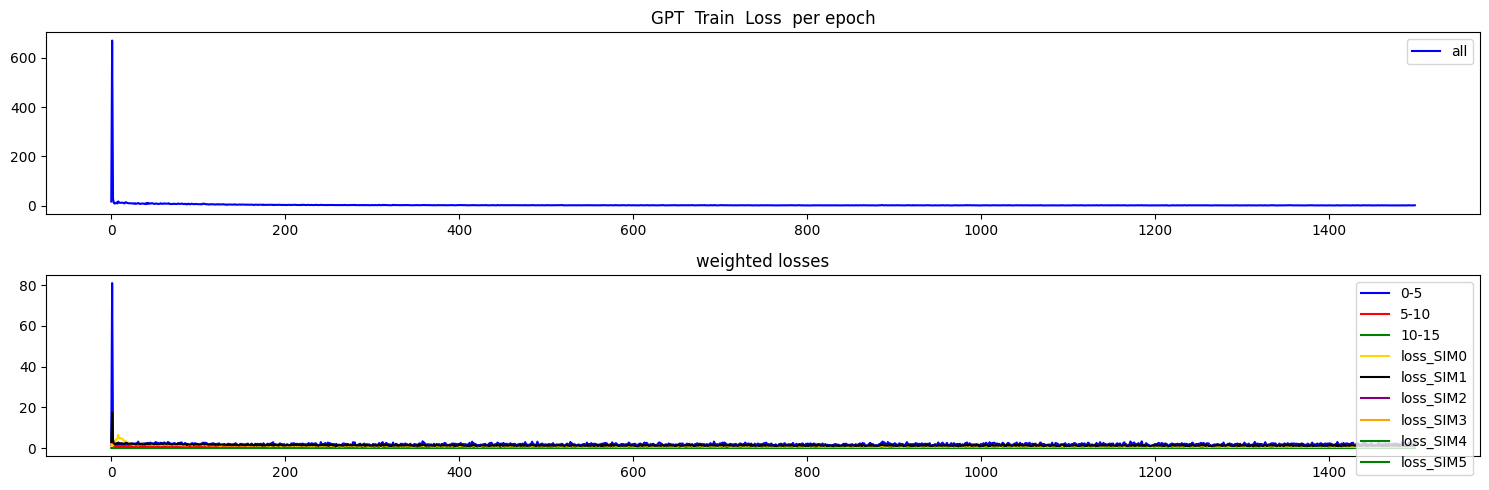

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.04209708049893379
Test MSE Loss - SI only 0-5:  0.014003641903400421
Test MSE Loss - SI only 5-10:  0.06184957176446915
Test MSE Loss - SI only 10-15:  0.03240491822361946
mae, mse, rmse, mape, mspe, rse, corr
(0.16622895, 0.04209708, 0.20517573, 5.2830596, 168.22812, 1.6194979)
Testing R**2 - SI only:  -1.6227736872819936
Testing R**2 - SI only:  -1.6227736872819936
Testing R**2 - All features:  0.9976424766003675
Testing R**2 - (f2) - SI full:  -4.0296403430395795


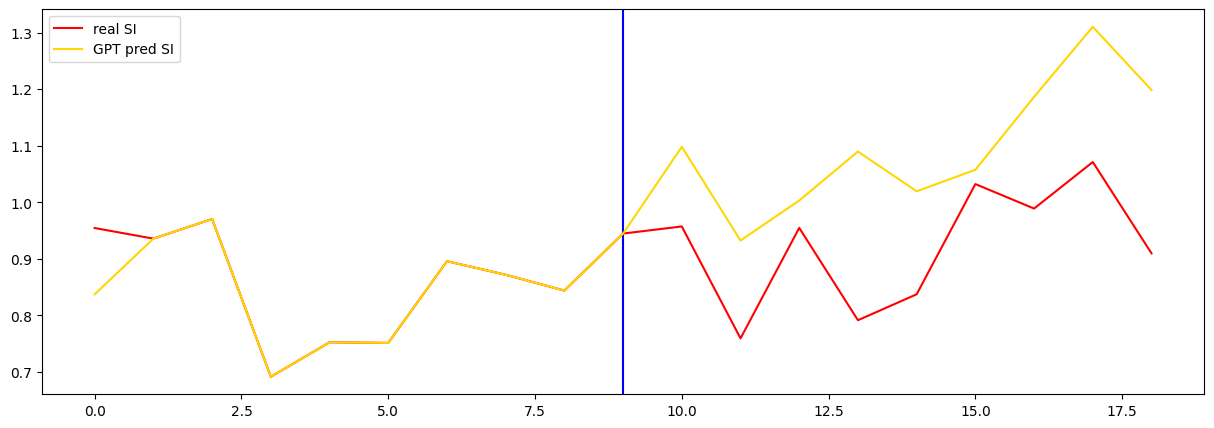

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


0 train loss =  7.127087116241455
seq length of pred =  10
[1.64626392 1.88111194 4.29018781 8.12444414 0.85858439 0.46871292]
loss_SI... [tensor(1.7172, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.2090, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(7.1271, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(7.1271, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  1.787305474281311
seq length of pred =  10
[1.07040378 1.0671302  2.25521944 4.35506134 0.23355288 0.24663864]
loss_SI... [tensor(0.4671, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7594, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(1.7873, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(1.7873, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.3964179456233978
seq length of pred =  10
[0.65141605 0.54608229 1.12405361 1.9026885  0.04132289 0.105

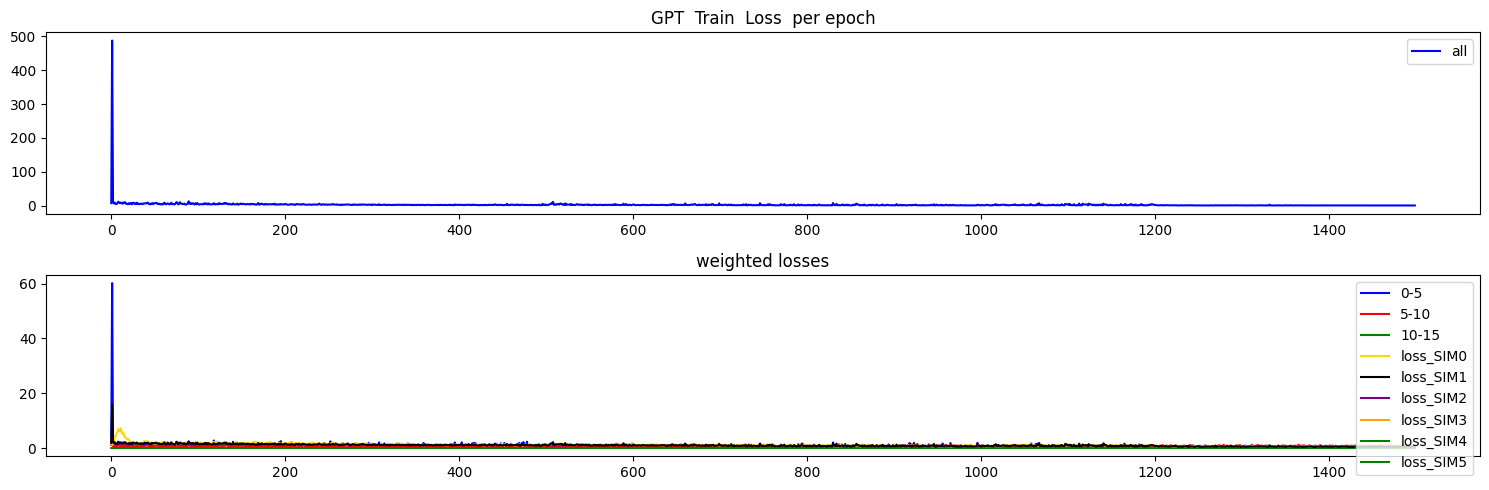

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.10299179702997208
Test MSE Loss - SI only 0-5:  0.014003641903400421
Test MSE Loss - SI only 5-10:  0.13619625568389893
Test MSE Loss - SI only 10-15:  0.18945816159248352
mae, mse, rmse, mape, mspe, rse, corr
(0.26906025, 0.102991804, 0.32092336, 6.6079626, 181.97343, 2.53312)
Testing R**2 - SI only:  -5.416696322154762
Testing R**2 - SI only:  -5.416696322154762
Testing R**2 - All features:  0.939040900304697
Testing R**2 - (f2) - SI full:  -1.1855631381831766


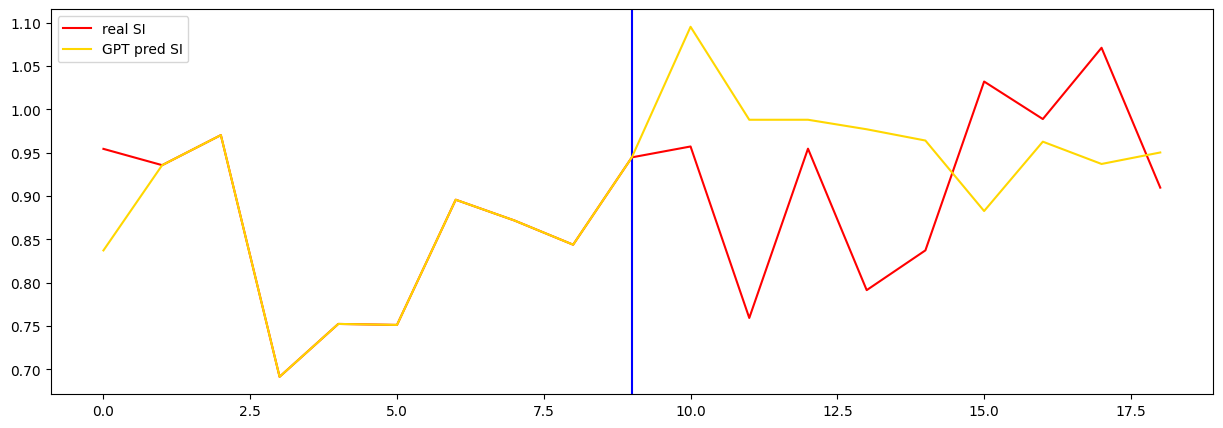

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  6.508823394775391
seq length of pred =  10
[1.6288272  1.76618941 3.97038126 8.69891353 0.77620378 0.4966943 ]
loss_SI... [tensor(1.5524, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.1266, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(6.5088, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(6.5088, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  1.7360332012176514
seq length of pred =  10
[1.65449691 1.02618655 2.1002281  3.91345571 0.16028776 0.21741421]
loss_SI... [tensor(0.3206, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.5007, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(1.7360, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(1.7360, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.7057259678840637
seq length of pred =  10
[0.72782259 0.6343584  1.11023739 2.21523801 0.06007829 0.12

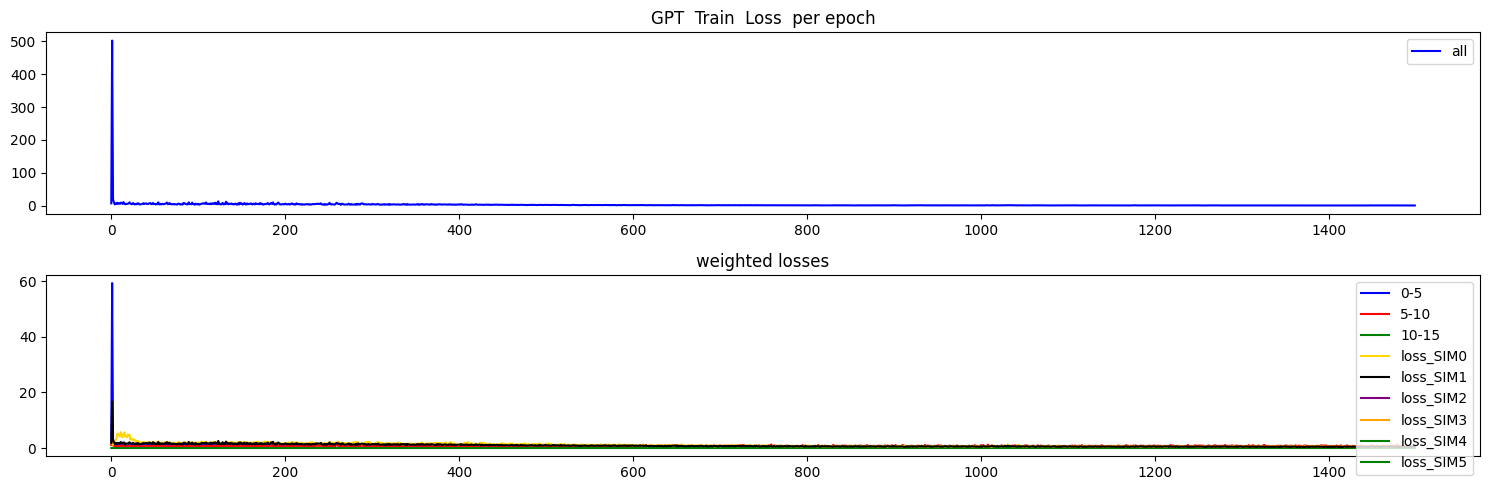

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.043479520827531815
Test MSE Loss - SI only 0-5:  0.014003641903400421
Test MSE Loss - SI only 5-10:  0.04011118412017822
Test MSE Loss - SI only 10-15:  0.05939657241106033
mae, mse, rmse, mape, mspe, rse, corr
(0.17036633, 0.043479517, 0.20851743, 5.461656, 169.79904, 1.6458747)
Testing R**2 - SI only:  -1.7089036740856711
Testing R**2 - SI only:  -1.7089036740856711
Testing R**2 - All features:  0.9986894008030269
Testing R**2 - (f2) - SI full:  -2.1276697889334106


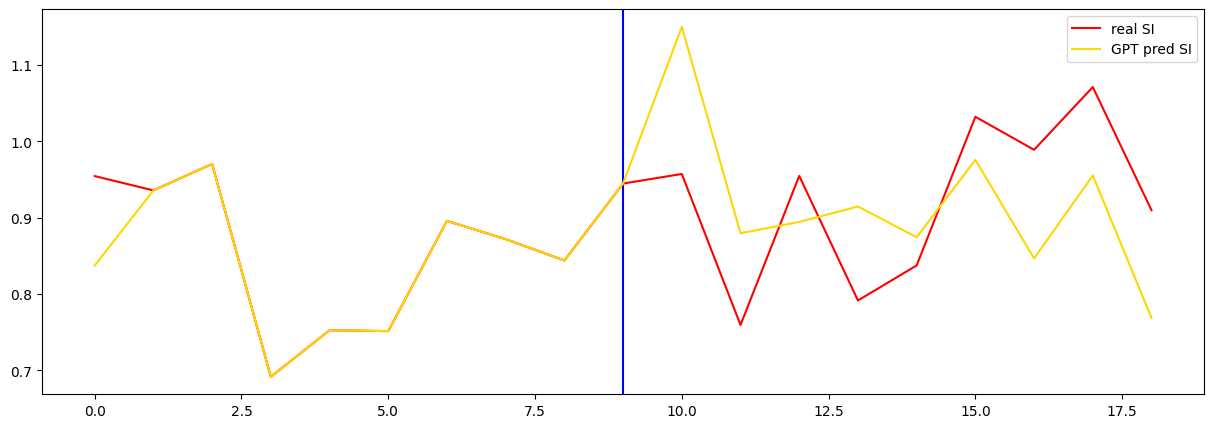

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


0 train loss =  12.175918579101562
seq length of pred =  10
[1.62872857 2.16195532 4.64238422 9.22422708 1.23272391 0.53029173]
loss_SI... [tensor(2.4654, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.4516, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(12.1759, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(12.1759, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  3.2080869674682617
seq length of pred =  10
[4.33795388 1.27988866 2.70197727 5.32466464 0.2754487  0.2958147 ]
loss_SI... [tensor(0.5509, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.4668, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(3.2081, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(3.2081, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  2.24090838432312
seq length of pred =  10
[2.10100029 1.28821256 2.51350186 4.96816088 0.2914782  0.2

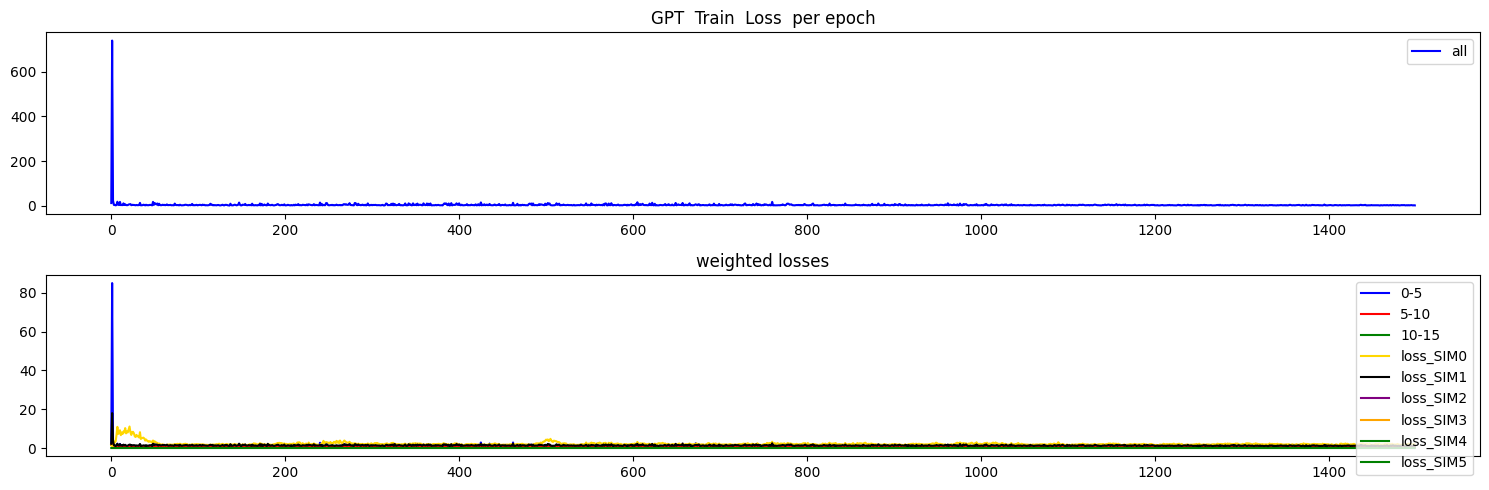

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.03539024665951729
Test MSE Loss - SI only 0-5:  0.014003641903400421
Test MSE Loss - SI only 5-10:  0.03713033348321915
Test MSE Loss - SI only 10-15:  0.031638167798519135
mae, mse, rmse, mape, mspe, rse, corr
(0.1566915, 0.035390247, 0.18812296, 5.040555, 166.65854, 1.4848965)
Testing R**2 - SI only:  -1.2049176826317716
Testing R**2 - SI only:  -1.2049176826317716
Testing R**2 - All features:  0.9793541192749686
Testing R**2 - (f2) - SI full:  -11.060526850086688


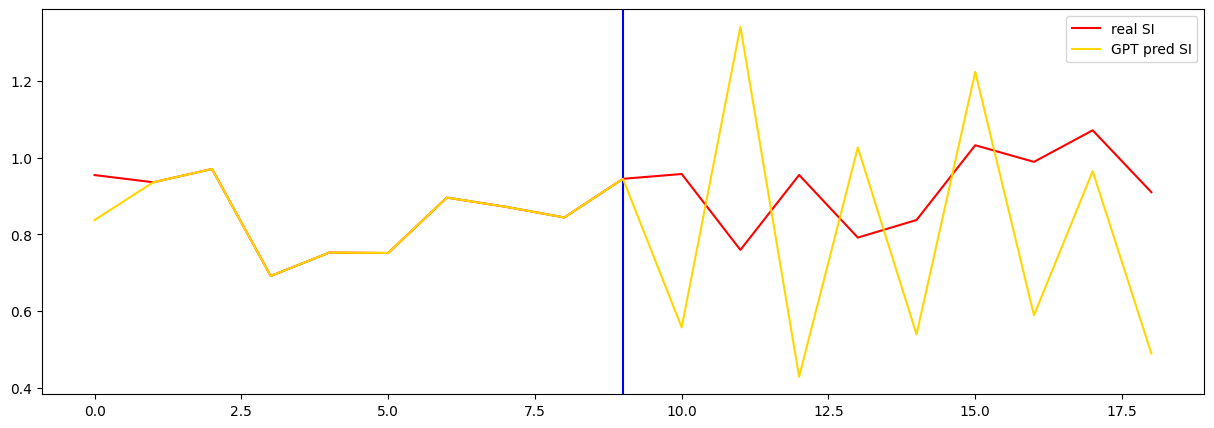

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )



## Train on Train, Test on Train



## 000 to 015


In [ ]:

inferenceGPT_obj.the_offset = 0
train_CIVS, test_CIVS                                    = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  train_CIVS  ) 
results_string  = inferenceGPT_obj.function_test_rc( train_CIVS, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 015 to 030


In [ ]:

inferenceGPT_obj.the_offset = 15
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 030 to 045


In [ ]:

inferenceGPT_obj.the_offset = 30
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 045 to 060


In [ ]:

inferenceGPT_obj.the_offset = 45
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 060 to 075


In [ ]:

inferenceGPT_obj.the_offset = 60
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 075 to 090


In [ ]:

inferenceGPT_obj.the_offset = 75
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 090 to 105


In [ ]:

inferenceGPT_obj.the_offset = 90
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## Save excel to csv


In [ ]:
 
## inferenceGPT_obj.save_Excel_to_CSV()



## Add the dates ( ??) 


In [ ]:

## tsDataWrangling_obj.add_dates_after_GPT_is_trained( tsGPT_obj )


In [ ]:

S1_review  = pd.read_csv( 'S1_df_copy_before.csv' )
S1_review


In [ ]:

S2_review  = pd.read_csv( 'S2_df_copy_after_shift_before_deltas.csv' )
S2_review


In [ ]:

S3_review  = pd.read_csv( 'S3_FINAL_after_deltas.csv' )
S3_review
